# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Shruti Sharma
##### **Team Member 2 -** Laxmi Priya

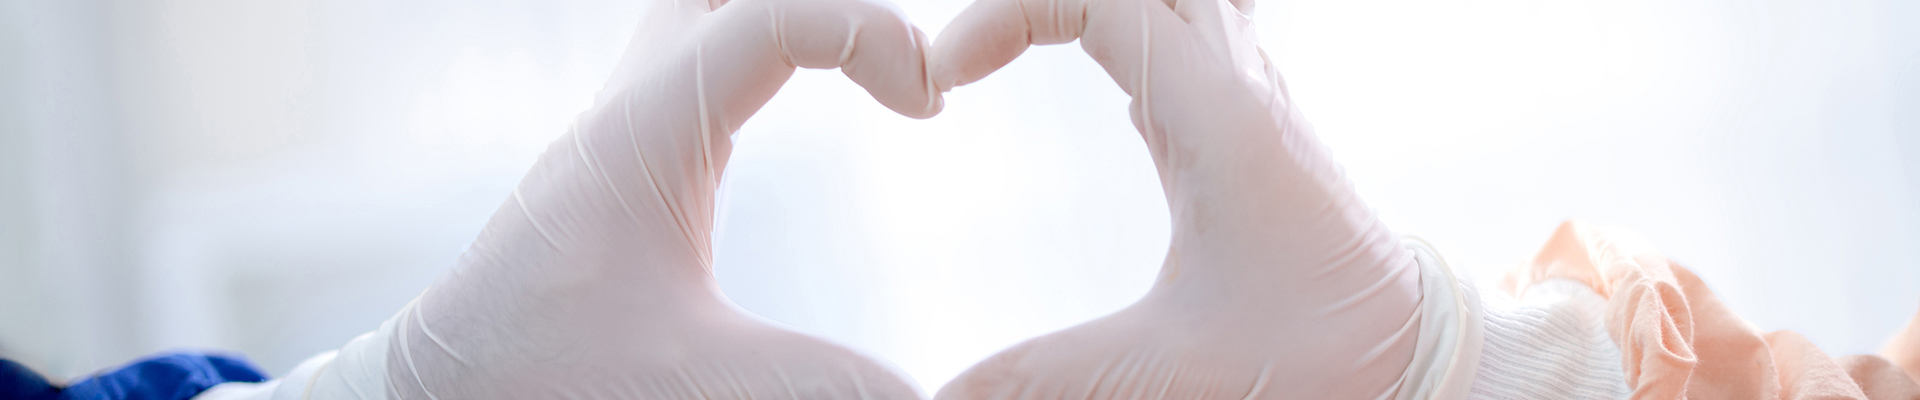

# **Project Summary -**

In this fast pace world we are dealing with so many serious and death causing health issue due to various reasons. Today we are talking about cardiovascular disease.

Early prediction can help us in prevention of and also in timely cure of this disease. How early prediction is possible? Machine Learing makes it possible. Machine Learning Technniques shows fruitful result in predicting cardiovascular risk on the basis of analyzation of various risk factors.

The goal of this project is to develop a machine learning model to the Ten Year risk of cardiovascular disease in individuals using a dataset of demographic, clinical and laboratory data.

The dataset used in this project is the Framingham Heart Study dataset, which is a widely used dataset for cardiovascular risk prediction. It contains data on 3,390 participants, who were followed up for ten years to track cardiovascular events. The dataset includes 17 variables.

While making this project firstly, we understood the variables then we did Data Wrangling which includes droping of ID column, checking of outliers and then checking for any null values in the dataset( found some features with null values).

Then we move towards Data Visualization to understand the relationship between the variables in which we plotted 15 visualization chart including correlation heatmap and pair plot . Then we moved forward for Feature Engineering and Data preprocessing in which we worked on handling outliers of continuous feature by plotting boxplot. Then we did categorical encoding by using dummies and then we moved for Feature Manipulation and Selection in which  we minimised the two features which are sysBP and diaBP(they are highly correlated with each other) into 1 feature(i.e., pulse_press). Then we did feature selection in which firstly we have plotted the correlation heatmap and then calculated VIF(Variance Inflation Factor) value and lastly we were left with 8 features. Then we did Data Splitting. we divided the data into train and test split in the ratio 80:20. Then we handled the limbalanced dataset by using SMOTE(Synthetic Minority Oversampling Technique).

Now we are ready for the implementation of ML Model. We did 6 ML Model Implementation which are Logistic Regrssion, RandomForestClasifier, K-NN, SVM, NaiveBayes and lastly XGboost. We got the highest accuracy in XGboost ML Model(84%). So we have chosen XGBoost as our final optimal model among all 6 models for deployment.

By the way, while building a ML Model on Cardiovascular risk prediction data, we applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task and we faced some failures as well but with the right approach and knowledge, we successfully created a model that can accurately predict a patient that can have CHD in future.


# **GitHub Link -**

# **Problem Statement**


**The dataset is from ongoing cardiovascular study on residents of the town of Framingham, Massachutts. The classification goal is to predict whether the patient has a 10-year risk of failure coronary heart disease(CHD). The dataset provides the patient's information . It includes over 4000 records and 15 attributes. Each attribute is a potental risk factor. There are both demographic, behavioral, and medical risk factor.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# For feature engineering ans selection
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# feature selection for classification
from sklearn.feature_selection import chi2

# to measure model performance
from sklearn.metrics import recall_score

# Implementation and selection of ML Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Importation  of Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"THe total no. of duplicates in the  given dataset is '{df.duplicated().sum()}'")

THe total no. of duplicates in the  given dataset is '0'


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

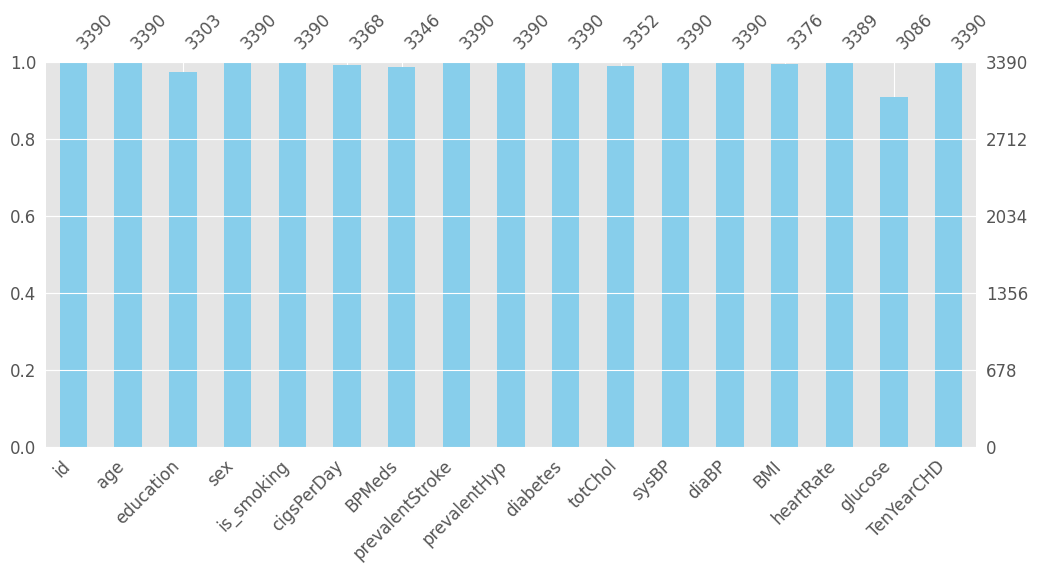

In [ ]:
# Visualizing the missing values
missingno.bar(df, figsize = (12,5), fontsize = 12, color = 'skyblue')

### What did you know about your dataset?



*   Total no. of rows and collumns in our dataset are 3390 and 17 respectively.
*   Number of duplicates-- 0



*   Some columns are containing null values like education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Given column names are---{df.columns.tolist()}'")

Given column names are---['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']'


In [ ]:
# Dataset Describe
df.describe(include = 'all')

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description

**1. Demographic:**

  Age: Age of the patient.

  Sex: male or female("M" or "F")


**2. Behavioral:**

   is_smoking: whether or not the patient is a current smoker ("YES" or "NO").

   CigsPerDay: the number of cigarettes that the person smoked on average in one day.(countinous type feature because a person can smoke 'n' times a day)


**3. Medical(history):**

  BPMeds: whether or not the patient was on blood pressure medication.

  Prevalent Stroke: whether or not the patient had previously had a stroke.

  Prevalent Hyp: whether or not the patient was hypertensive.

  Diabetes: whether or not the patient had diabetes.


**4. Medical(current):**

   Tot Chol: total cholesterol level.

   Sys BP: systolic blood pressure.

   Dia BP: diastolic blood pressure.

   BMI: Body Mass Index.

   Heart Rate: heart rate.

   Glucose: glucose level.



**5.Target feature(class of risk):**

   TenYearCHD: 10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”).



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# first we have to drop the ID column
df.drop(labels ='id', axis = 1)

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0                0   
1      36        4.0   M         NO         0.0     0.0                0   
2      46        1.0   F        YES        10.0     0.0                0   
3      50        1.0   M        YES        20.0     0.0                0   
4      64        1.0   F        YES        30.0     0.0                0   
...   ...        ...  ..        ...         ...     ...              ...   
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     NaN                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0    NaN       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3390 rows x 16 columns]

In [ ]:
# now storing those features in a separate list which are containing missing values
null_clmns = ['education','cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

<Axes: >

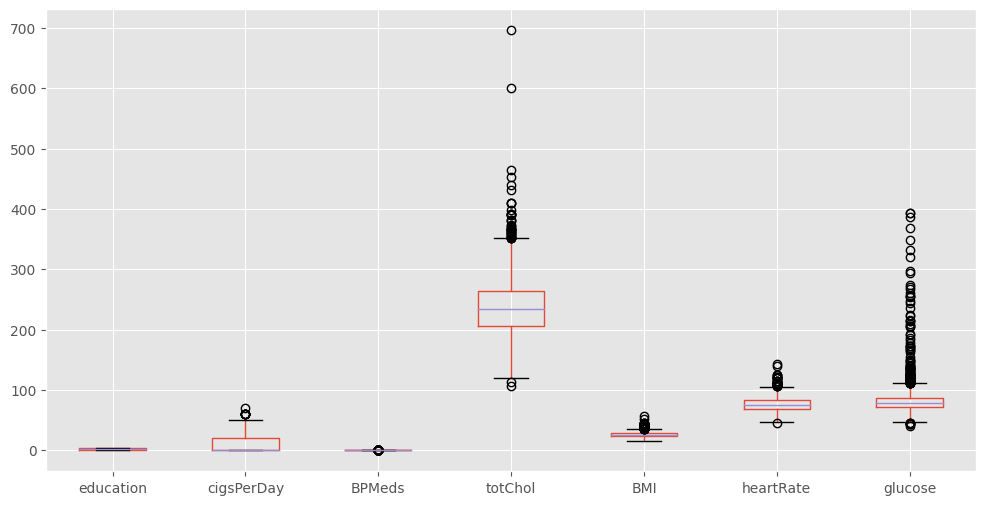

In [ ]:
# plot box plot nd check outliers
plt.figure(figsize=(12,6))
df[null_clmns].boxplot()

In [ ]:
# filling up the NaN values of each column
df['education'].fillna(df['education'].mode()[0], inplace = True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace = True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace = True)
df['totChol'].fillna(df['totChol'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['heartRate'].fillna(df['heartRate'].median(), inplace = True)
df['glucose'].fillna(df['glucose'].median(), inplace = True)

In [ ]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

### What all manipulations have you done and insights you found?



*   We have replaced null values glucose, heartRate and totChol with median as they are containing high amount of outliers.
*   Null values from categorical features like Education and BPmeds are replaced with mode.


*   As CigsPerDay feature is having median value as zero and contains less number of outliers We have replaced null values within it with mean.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Creating a separate list of categorical and continuous features
categ_feature =['education','sex','is_smoking','BBPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
cont_feature =['cigsPerDay','age','sysBP', 'diaBP','totChol','BMI','heartRate','glucose']

#### Chart - 1

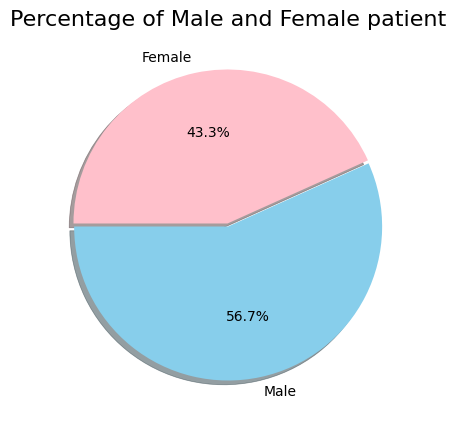

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize =(10,5))
labels = 'Male', 'Female'
sizes = df.sex.value_counts()
colors = ['skyblue', 'pink']
explode= [0, 0.02]
plt.pie(sizes,labels =labels, colors = colors, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Percentage of Male and Female patient', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

We have picked pie chart to show the comparison between two variables.

##### 2. What is/are the insight(s) found from the chart?

Percentage of Male Patient is 56.7%.

Percentage of Female Patient is 43.3%.

#### Chart - 2

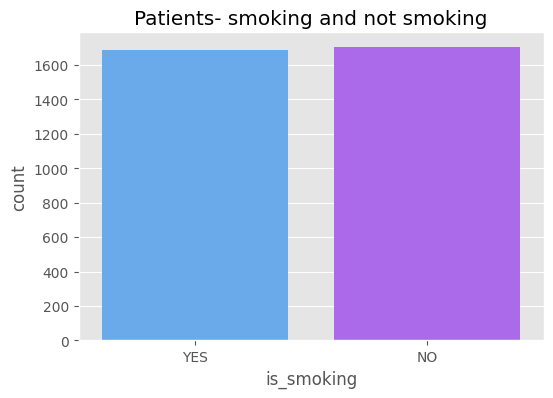

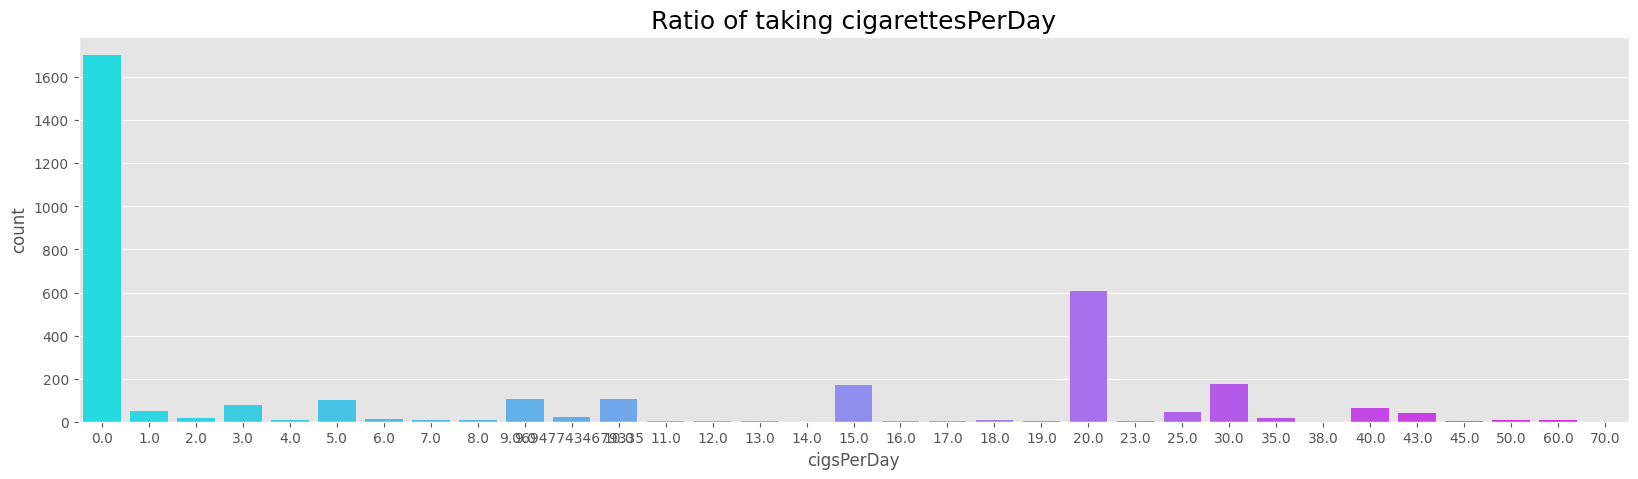

In [ ]:
# Chart - 2 visualization code

# Bar plot of patients doing smoke and not doing smoke
plt.figure(figsize =(6,4))
sns.countplot(x ='is_smoking', palette = 'cool', data = df)
plt.title('Patients- smoking and not smoking')
plt.show()

# Bar plot of patients consuming cigarettes per day
plt.figure(figsize =(20,5))
sns.countplot(x= 'cigsPerDay', palette ='cool', data =df)
plt.title('Ratio of taking cigarettesPerDay', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

We have picked Bar plot to show the ratio patients doing smoking and not smoking and also to show the patients consuming cigs per day.

##### 2. What is/are the insight(s) found from the chart?



1.   Patients taking smoke and not taking smoke are almost equal with a slight difference.
2.   Most of the patients are consuming 20 cigarettes per day. It will ultimately increase the pace of number of patients having cardiovascular disease



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More smoking are raising  the risk of cardiovasccular disease. Companies that are selling the cigarette packets must either stop selling these items or do advertisement at high level to bring awareness about the health loss and ultimately life loss on cosuming these smokes.

#### Chart - 3

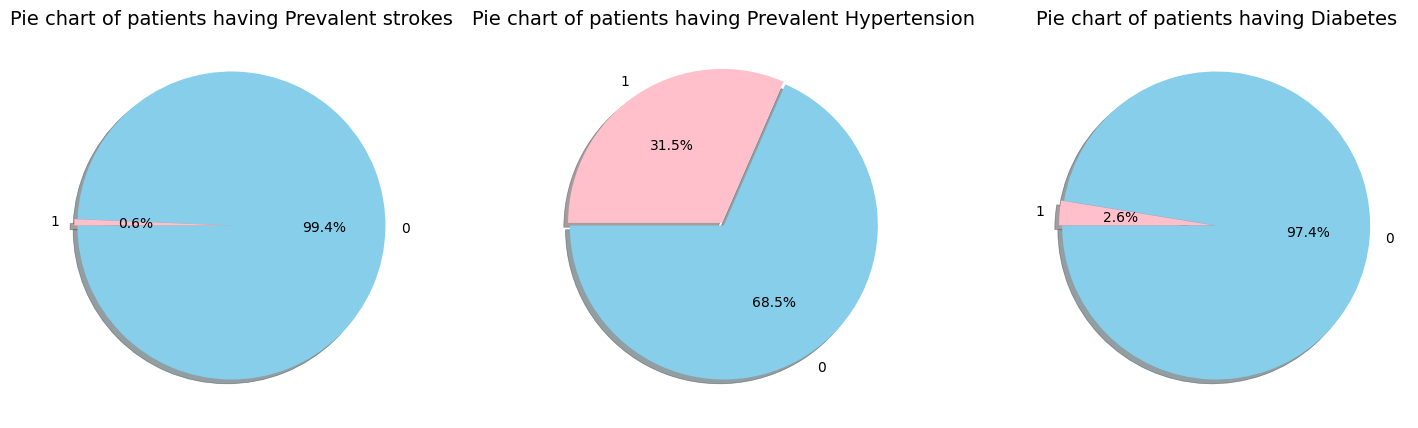

In [ ]:
# Chart - 3 visualization code

# prevalent stroke
plt.figure(figsize =(18,5))
plt.subplot(1,3,1)
labels = '0','1'
sizes = df.prevalentStroke.value_counts()
colors = ['skyblue', 'pink']
explode= [0, 0.02]
plt.pie(sizes,labels =labels, colors = colors, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Pie chart of patients having Prevalent strokes', fontsize = 14)

# prevalent hypertension
plt.subplot(1,3,2)
labels = '0','1'
sizes = df.prevalentHyp.value_counts()
colors = ['skyblue', 'pink']
explode= [0, 0.02]
plt.pie(sizes,labels =labels, colors = colors, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Pie chart of patients having Prevalent Hypertension', fontsize = 14)

# diabetes
plt.subplot(1,3,3)
labels = '0','1'
sizes = df.diabetes.value_counts()
colors = ['skyblue', 'pink']
explode= [0, 0.02]
plt.pie(sizes,labels =labels, colors = colors, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Pie chart of patients having Diabetes', fontsize = 14)

plt.show()

##### 1. Why did you pick the specific chart?

Here we have picked pie chart to show the percentage of Yes and No questions.

##### 2. What is/are the insight(s) found from the chart?

In first chart only 0.6% patients have a history of prevalent strokes.

In 2nd chart only 31.5% patients have a history of prevalnt hypertension.

Third chart is showing that only 2.6% patients have diabetes.

#### Chart - 4

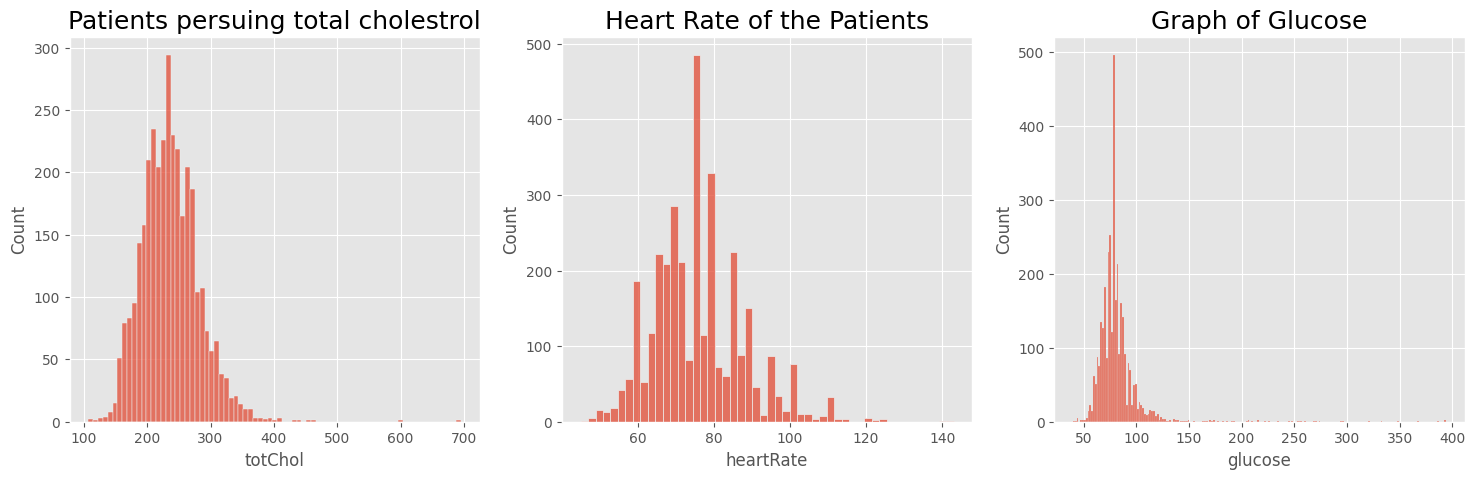

In [ ]:
# Chart - 4 visualization code

# histogram for tot chol, heart rate and glucose
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
sns.histplot(x= 'totChol', data =df)
plt.title('Patients persuing total cholestrol',fontsize = 18)

# heart rate
plt.subplot(1,3,2)
sns.histplot(x= 'heartRate', data =df)
plt.title('Heart Rate of the Patients', fontsize = 18)

# glucose
plt.subplot(1,3,3)
sns.histplot(x= 'glucose', data =df)
plt.title('Graph of Glucose', fontsize = 18)

plt.show()

##### 1. Why did you pick the specific chart?

We have picked the histogram chart to represent the the distribution of columns having numerical data.

##### 2. What is/are the insight(s) found from the chart?



1.   The majority of the individuals in the dataset have total cholesterol levels between 200-250 mg/dL, with a few individuals having total cholesterol levels below 160 mg/dL or above 300 mg/dL.
2.   The majority of the individuals in the dataset have a heart rate between 60-90 beats per minute, with a few individuals having a heart rate below 50 beats per minute or above 100 beats per minute.


3.   The majority of the individuals in the dataset have a blood glucose level between 70-90 mg/dL, with a few individuals having a blood glucose level below 60 mg/dL or above 130 mg/dL.




#### Chart - 5

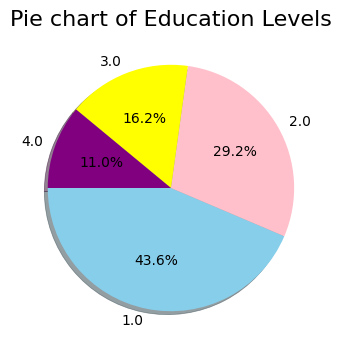

In [ ]:
# Chart - 5 visualization code
# education levels
plt.figure(figsize =(8,4))
labels = '1.0','2.0','3.0','4.0'
sizes = df.education.value_counts()
colors = ['skyblue', 'pink','yellow','purple']
plt.pie(sizes,labels =labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Pie chart of Education Levels', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

We have picked pie chart to show the different distribution of education levels



##### 2. What is/are the insight(s) found from the chart?

According to the chart most of the education level is of 1 with 43.6% and least is level 4 with 11.0%.

#### Chart - 6

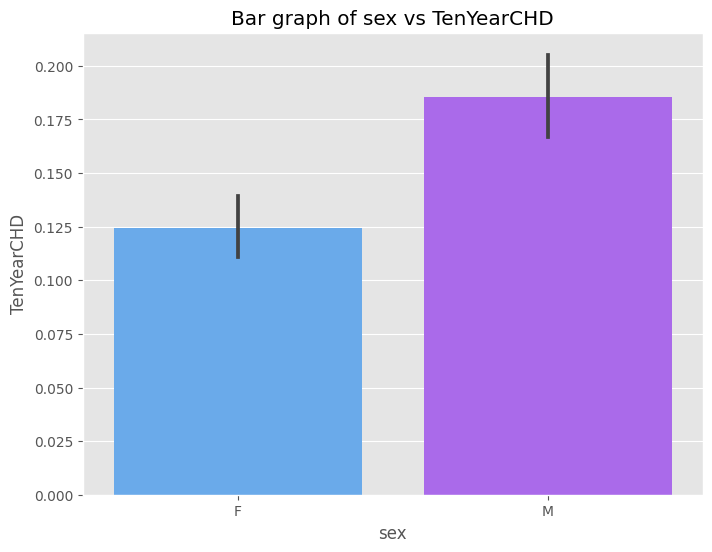

In [ ]:
# Chart - 6 visualization code
# sex vs ten year CHD
plt.figure(figsize =(8,6))
sns.barplot(df, x= 'sex', y = 'TenYearCHD', palette = 'cool')
plt.title('Bar graph of sex vs TenYearCHD')
plt.show()

##### 1. Why did you pick the specific chart?

We have picked bar chart to know the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

Female has less chances of having cardio risk meanwhile Male has high chances of having cardio risk.

#### Chart - 7

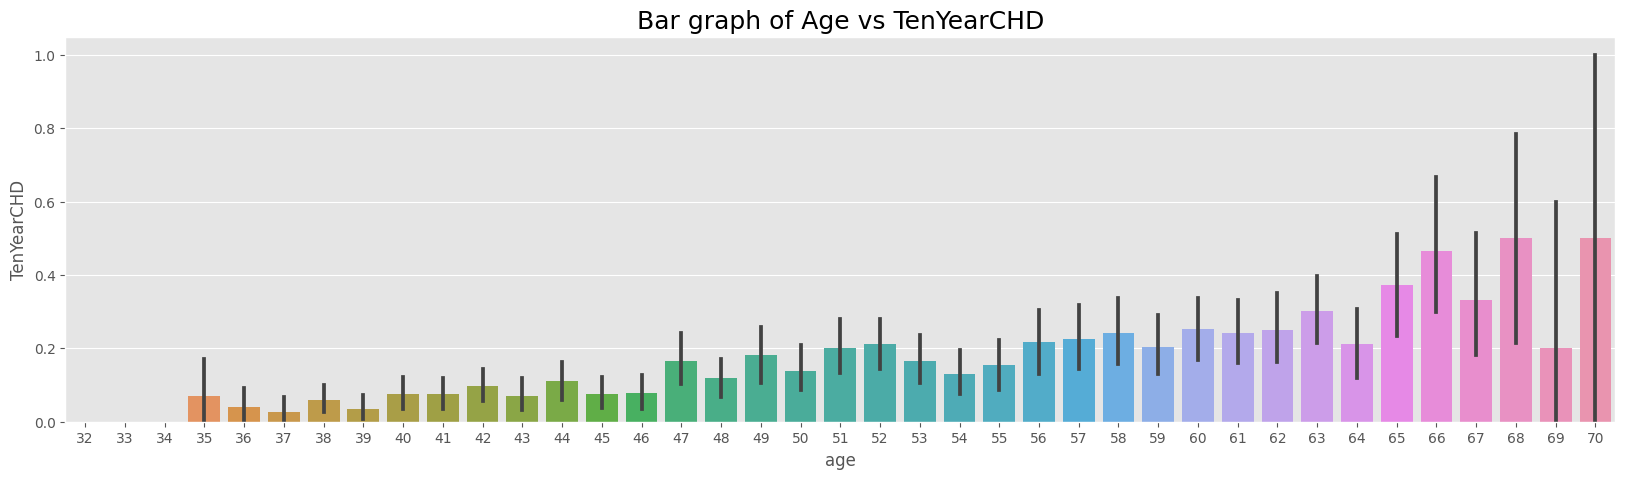

In [ ]:
# Chart - 7 visualization code
# age vs TenYearCHD
plt.figure(figsize =(20,5))
sns.barplot(df, x= 'age', y = 'TenYearCHD')
plt.title('Bar graph of Age vs TenYearCHD', fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

Here we have picked the bar chart for best result to know the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

From the graph we can observe that patients of age group 65 to 70 are more tends to cardio risk.

#### Chart - 8

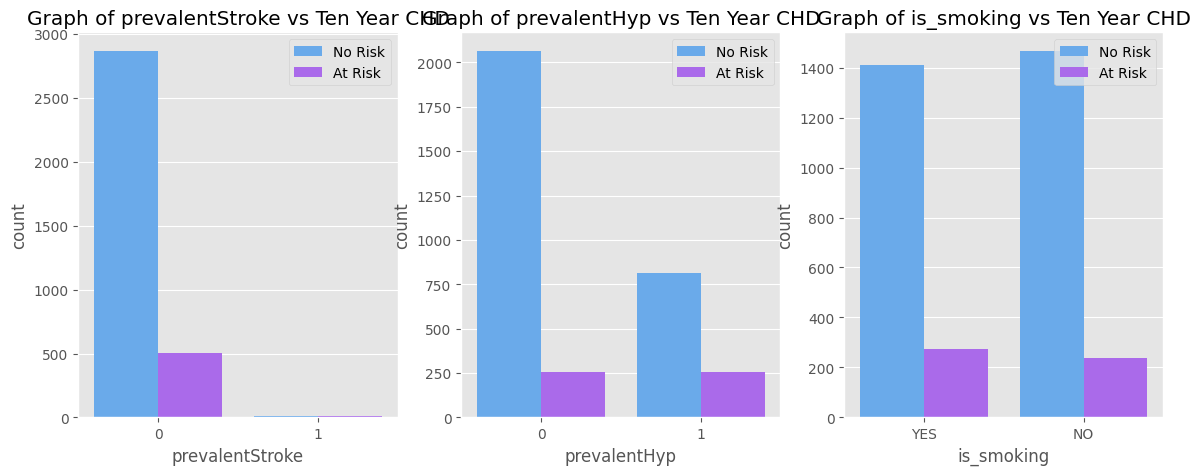

In [ ]:
# Chart - 8 visualization code
# prevalent stroke vs Ten Year CHD
plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
sns.countplot(data = df, x = 'prevalentStroke', hue = 'TenYearCHD', palette = 'cool')
plt.legend(['No Risk', 'At Risk'])
plt.title('Graph of prevalentStroke vs Ten Year CHD')
# prevalentHyp vs TenYearCHD

plt.subplot(1,3,2)
sns.countplot(data = df, x = 'prevalentHyp', hue = 'TenYearCHD', palette = 'cool')
plt.legend(['No Risk', 'At Risk'])
plt.title('Graph of prevalentHyp vs Ten Year CHD')

# is smoking vs Ten Year CHD

plt.subplot(1,3,3)
sns.countplot(data = df, x = 'is_smoking', hue = 'TenYearCHD', palette = 'cool')
plt.legend(['No Risk', 'At Risk'])
plt.title('Graph of is_smoking vs Ten Year CHD')

plt.show()

##### 1. Why did you pick the specific chart?

We have picked feature distribution bar chart as it is useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Patients having prevalent stroke or prevalent hypertension are more prone to CHD

Smokers are slightly at more risk of CHD than non-smokers.

#### Chart - 9

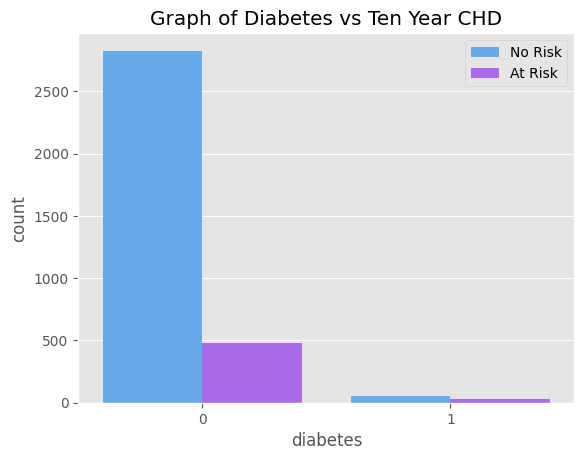

In [ ]:
# Chart - 9 visualization code
# Diabetes vs  Ten Year CHD
sns.countplot(data = df, x = 'diabetes', hue = 'TenYearCHD', palette = 'cool')
plt.legend(['No Risk', 'At Risk'])
plt.title('Graph of Diabetes vs Ten Year CHD')
plt.show()

##### 1. Why did you pick the specific chart?

We have picked feature distribution bar chart as it is useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Patients having diabetes are more prone to CHD.


#### Chart - 10

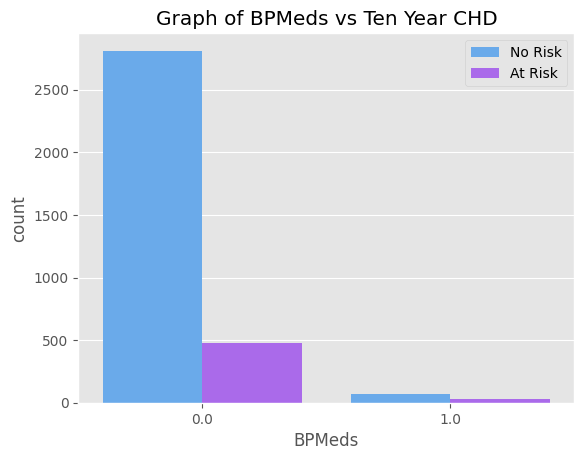

In [ ]:
# Chart - 10 visualization code
# BPMeds vs Ten Year CHD
sns.countplot(data = df, x = 'BPMeds', hue = 'TenYearCHD', palette = 'cool')
plt.legend(['No Risk', 'At Risk'])
plt.title('Graph of BPMeds vs Ten Year CHD')
plt.show()

##### 1. Why did you pick the specific chart?

We have picked feature distribution bar chart as it is useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

People who are not on a BP medication are having minimal chances as compared to medicated patients of suffering to CHD.

#### Chart - 11

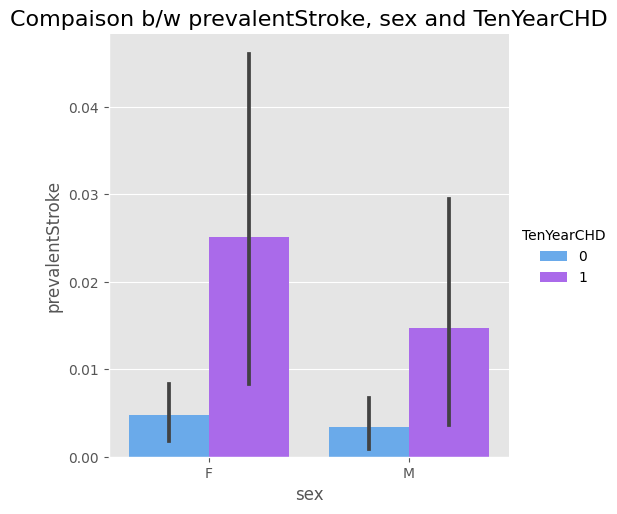

In [ ]:
# Chart - 11 visualization code

# Analysing the relationship b/w prevalent stroke, sex and Ten year CHD
sns.catplot(data =df, x = 'sex', y ='prevalentStroke',kind = 'bar', hue ='TenYearCHD', palette ='cool')
plt.title('Compaison b/w prevalentStroke, sex and TenYearCHD',fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen catplot bar chart to show the relationship between numeric and a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the observation we can say that both Male and Female patients having prevalent stroke are more prone to CHD and prevalent stroke in Females are more so they are at more risk of CHD as compared to Males.

#### Chart - 12

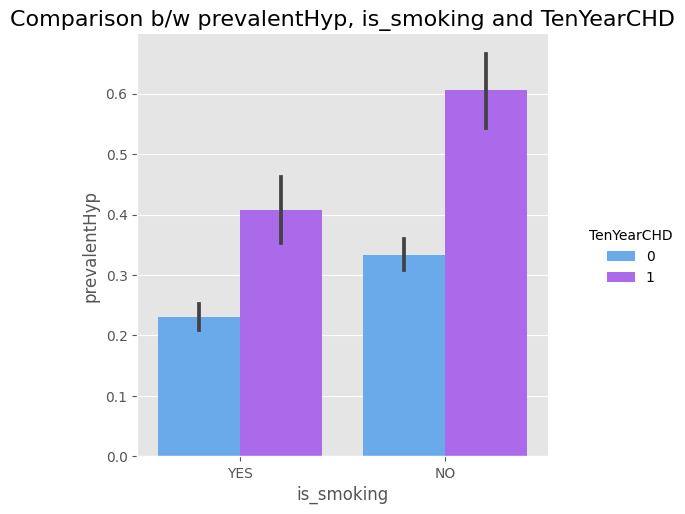

In [ ]:
# Chart - 12 visualization code

# Analysing the relationship b/w prevalentHyp, is smoking and Ten year CHD
sns.catplot(data =df, x = 'is_smoking', y ='prevalentHyp',kind = 'bar', hue ='TenYearCHD', palette ='cool')
plt.title('Comparison b/w prevalentHyp, is_smoking and TenYearCHD', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen catplot bar chart to show the relationship between numeric and a categorical variable.

##### 2. What is/are the insight(s) found from the chart?



*   Patients who are not smoking have strong history of prevalent hypertension as compared to  those who are smoking.
*   Patients having history of prevalent hypertension regardless of smoking or not are at high risk of CHD.



#### Chart - 13

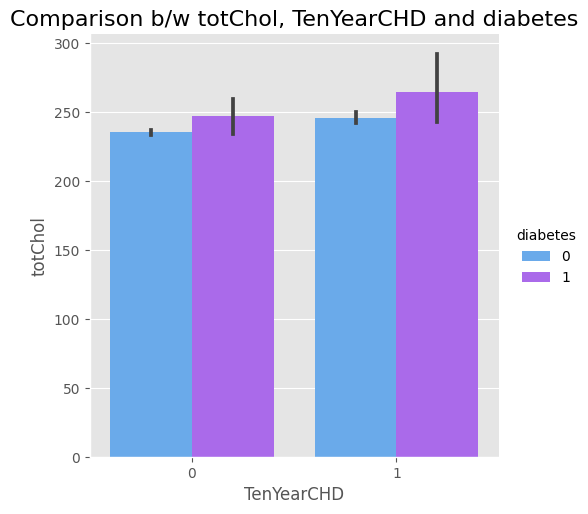

In [ ]:
# Chart - 13 visualization code

# Analysing the relationship b/w totChol,Ten year CHD and diabetes
sns.catplot(data =df, x = 'TenYearCHD', y ='totChol',kind = 'bar', hue ='diabetes', palette ='cool')
plt.title('Comparison b/w totChol, TenYearCHD and diabetes', fontsize =16)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen catplot bar chart to show the relationship between numeric and a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the observation we can see that there is not much difference in cholestrol level for being a solitary reason of CHD. At the same time diabetic patients are slightly more prone to CHD. We should avoid foods having high cholestrol. Low cholestrol meal can reduce overweight and reduction in overweight will ultimatelyredduce the chances of diabetes as overweight is the main factor for diabetes.

#### Chart - 14 - Correlation Heatmap

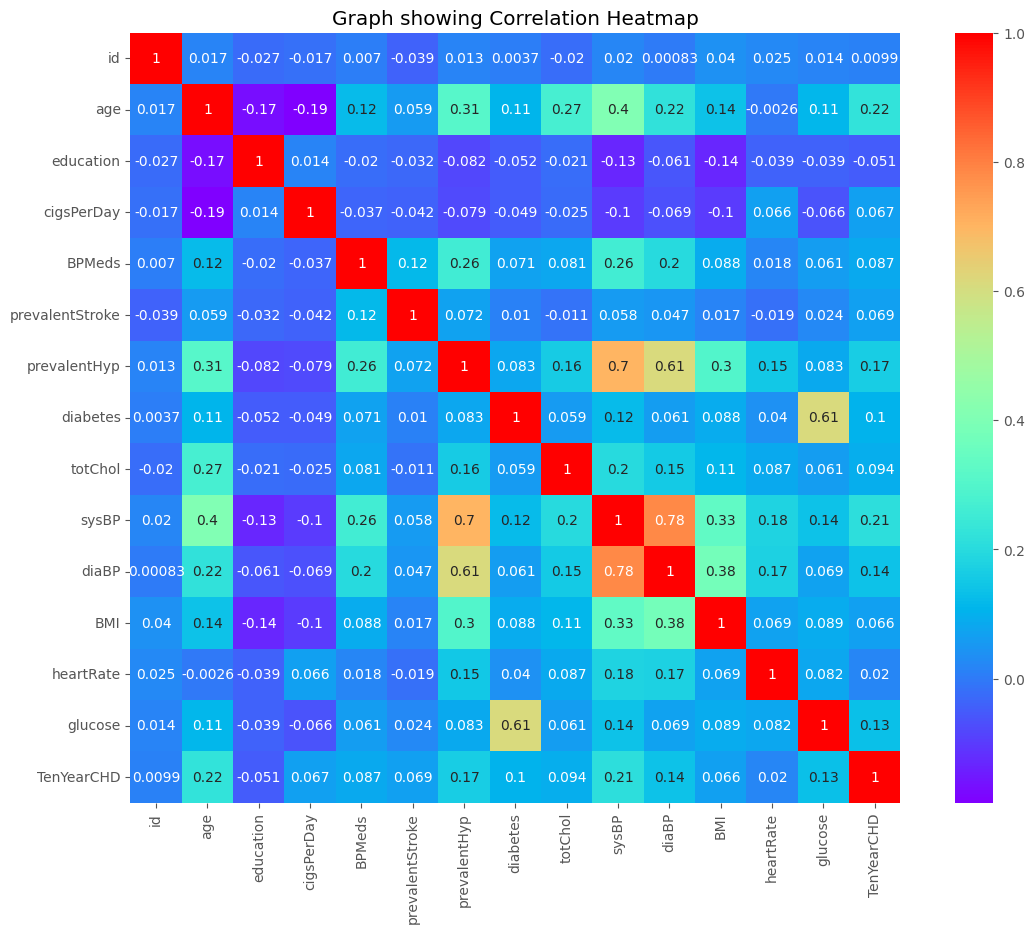

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, cmap = 'rainbow',square =True).set_title('Graph showing Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation can be best represented by heat maps as it gives better visualization for the density of locations or events within a dataset and assist in directing viewers towards areas on data visualizations.

##### 2. What is/are the insight(s) found from the chart?

**Highly correlated variables**

*   prevalentHyp and diaBP
*   prevalentHyp and sysBP

*   diaBP and sysBP
*   diabetes and glucose


**Weak correlated variables**


*  glucose and cigPerDay.

*  BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education.


*   BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay.











#### Chart - 15 - Pair Plot

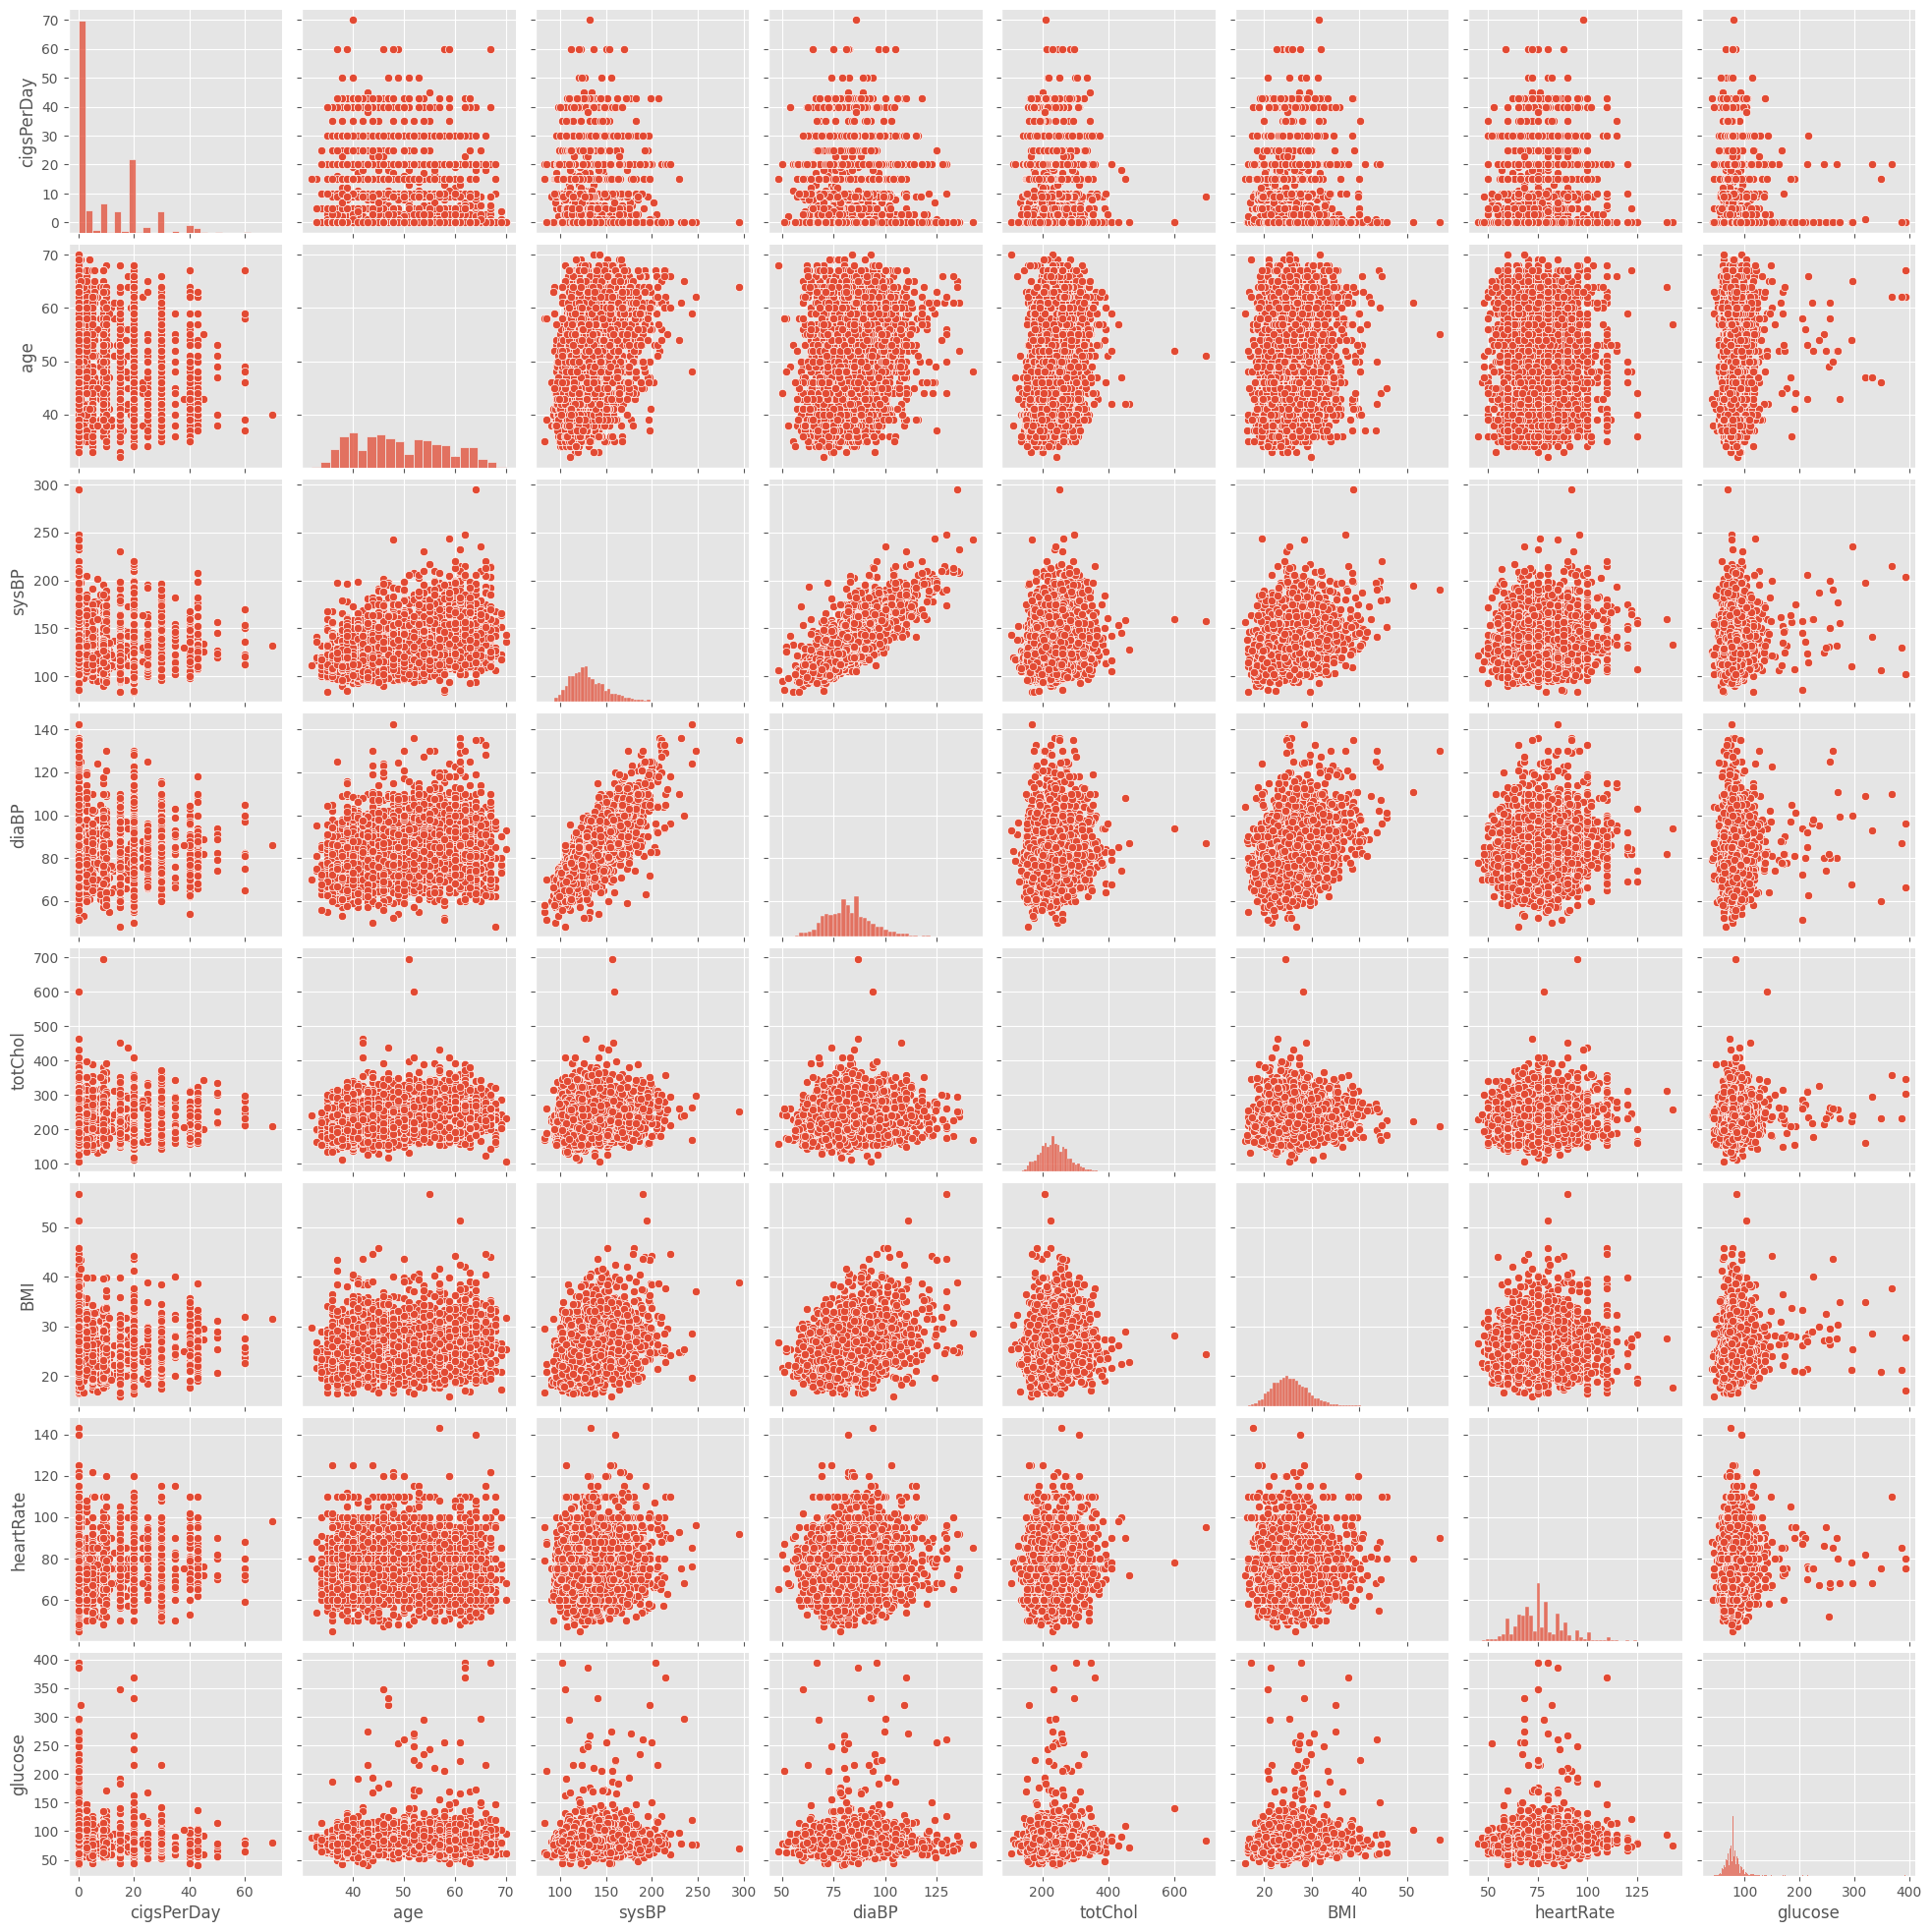

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[cont_feature])
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, povides visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows us to quickly see how all of the variables in a dataset are related to one another..

##### 2. What is/are the insight(s) found from the chart?

There are some positive correlations between certain variables, such as age and systolic blood pressure, as well as between BMI and glucose levels.

Weak positive correlation between cigsPerDay and sysBP.

# ***5. Feature Engineering & Data Pre-processing***




### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have used box plot to check outliers and then replaced the null values with Mean, Median, Mode and 0 according to the requirement.

### 2. Handling Outliers

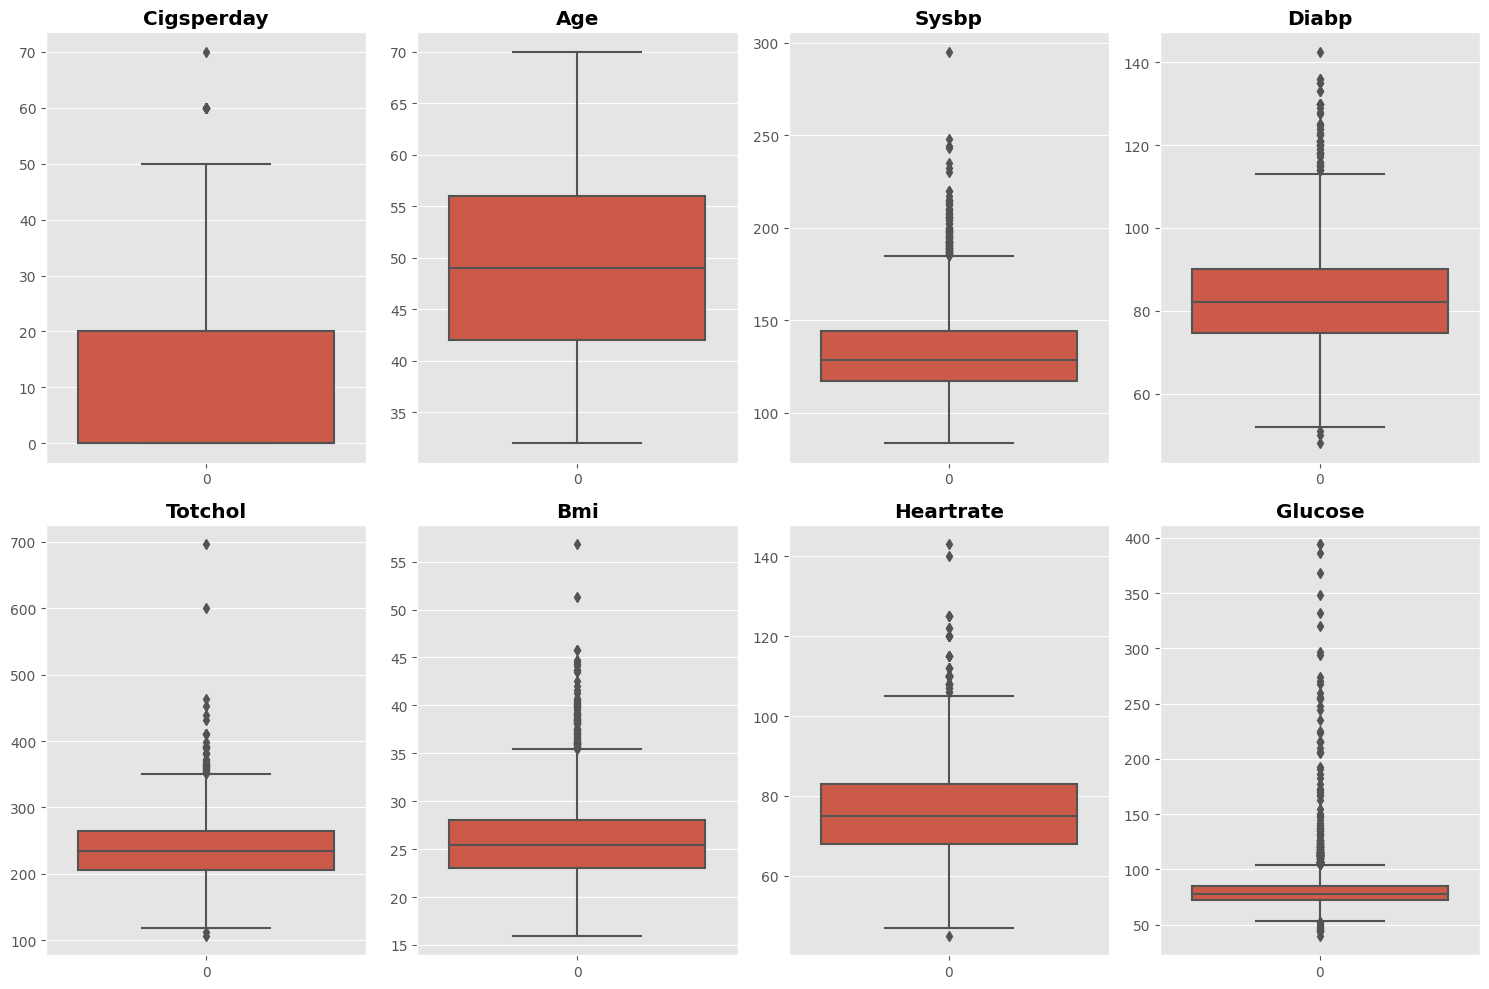

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
for ax, col in zip(axes, cont_feature):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

In [ ]:
df[cont_feature] = np.log(df[cont_feature] +1 )

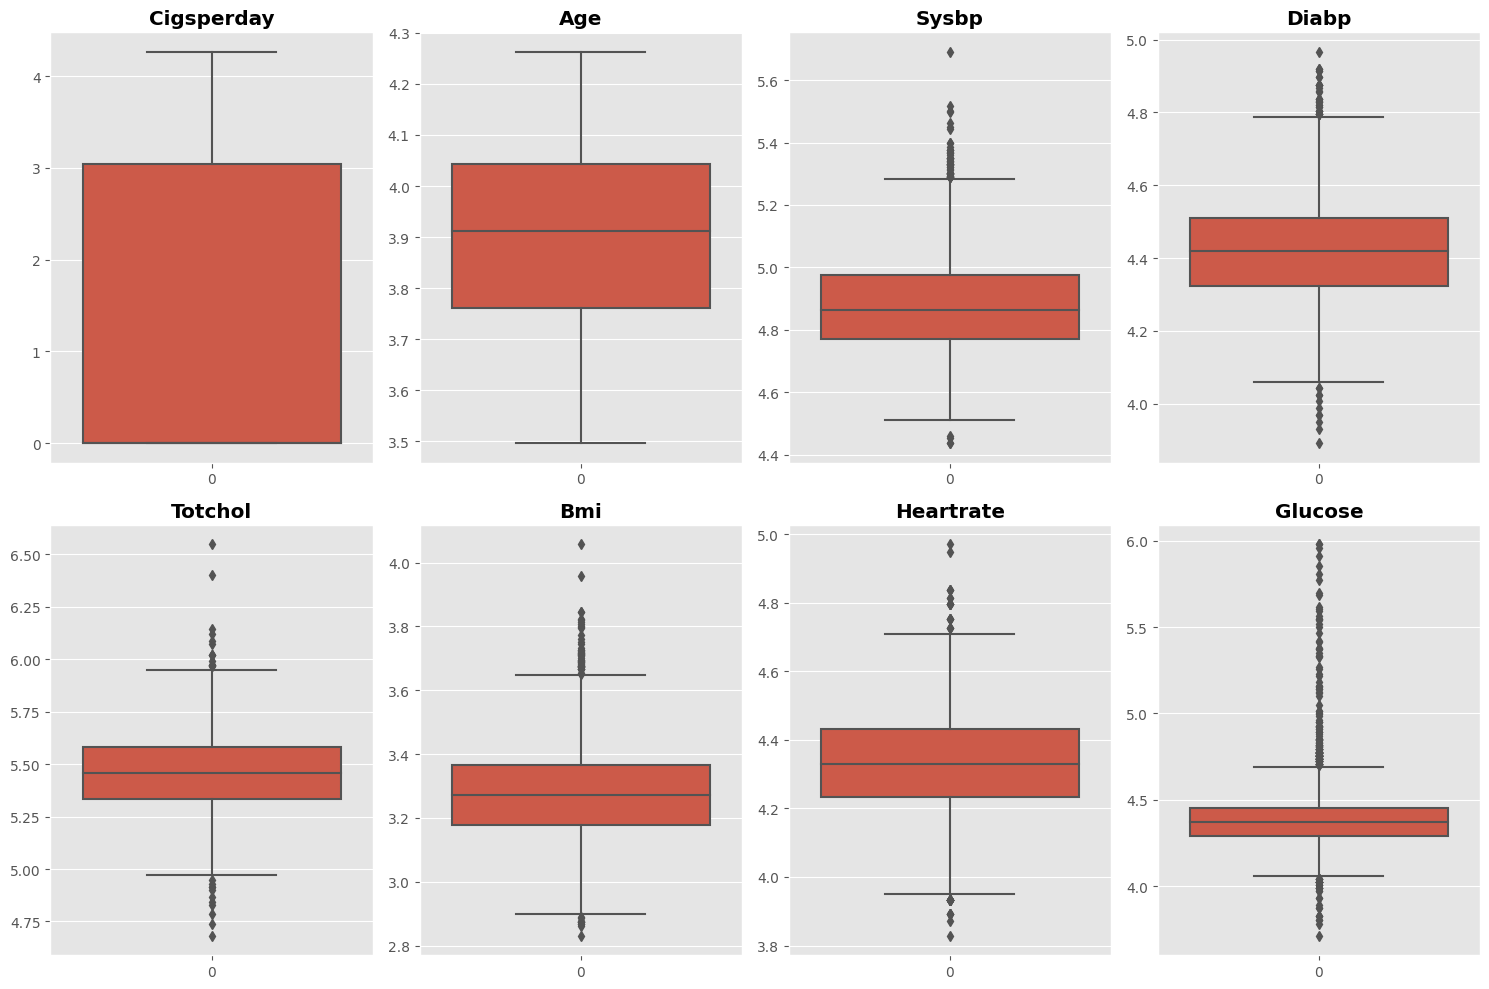

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
for ax, col in zip(axes, cont_feature):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used 'LOG TRANSFORMATION' method to remove outliers from the dataset.
We have used this method bcoz. it is a statistical model and easy to implement yet it shows effective results.
This transformaton can also help to normalize the distribution of the data and make it more symmetrical.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   float64
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(10)

In [ ]:
df.head()

id       age  education sex is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0   F        YES    1.386294     0.0   
1   1  3.610918        4.0   M         NO    0.000000     0.0   
2   2  3.850148        1.0   F        YES    2.397895     0.0   
3   3  3.931826        1.0   M        YES    3.044522     0.0   
4   4  4.174387        1.0   F        YES    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  
0  3.272606   4.510860  4.394449           1  
1  3.426540   4.290459  4.330733           0  
2  3.061052   4.488636  4.553877           0  
3  3.376221   4.234107  4.553877           1  
4  3.311273   4.262680  4.356709           0

In [ ]:
df['sex'] = pd.get_dummies(df['sex'],drop_first = True)
df['is_smoking'] = pd.get_dummies(df['is_smoking'],drop_first = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   float64
 2   education        3390 non-null   float64
 3   sex              3390 non-null   uint8  
 4   is_smoking       3390 non-null   uint8  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(10)

In [ ]:
df.head()

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   
2   2  3.850148        1.0    0           1    2.397895     0.0   
3   3  3.931826        1.0    1           1    3.044522     0.0   
4   4  4.174387        1.0    0           1    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  
0  3.272606   4.510860  4.394449           1  
1  3.426540   4.290459  4.330733           0  
2  3.061052   4.488636  4.553877           0  
3  3.376221   4.234107  4.553877           1  
4  3.311273   4.262680  4.356709           0

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used one hot encoding technique to convert the categorical variable into numerical variable. We have used this technique to make it in machine-readable form as it can read only in binary form.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.head()

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   
2   2  3.850148        1.0    0           1    2.397895     0.0   
3   3  3.931826        1.0    1           1    3.044522     0.0   
4   4  4.174387        1.0    0           1    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  
0  3.272606   4.510860  4.394449           1  
1  3.426540   4.290459  4.330733           0  
2  3.061052   4.488636  4.553877           0  
3  3.376221   4.234107  4.553877           1  
4  3.311273   4.262680  4.356709           0

From the correlation heatmap it is quite clear that sysBP and diaBP are showing pretty high correlation with each other. So we will create a new fature names pulse_press containing information of both diaBP and sysBP.

In [ ]:
# Here sysBP and diaBP are highly correlated. so we will minimize these two features into 1 feature
df['pulse_press'] = df['sysBP'] - df['diaBP']

In [ ]:
df.head()

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   
2   2  3.850148        1.0    0           1    2.397895     0.0   
3   3  3.931826        1.0    1           1    3.044522     0.0   
4   4  4.174387        1.0    0           1    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  pulse_press  
0  3.272606   4.510860  4.394449           1     0.549599  
1  3.426540   4.290459  4.330733           0     0.534779  
2  3.061052   4.488636  4.553877           0     0.485508  
3  3.376221   4.234107  4.553877           1     0.580268  
4  3.311273   4.262680  4.356709           0     0.469277

#### 2. Feature Selection

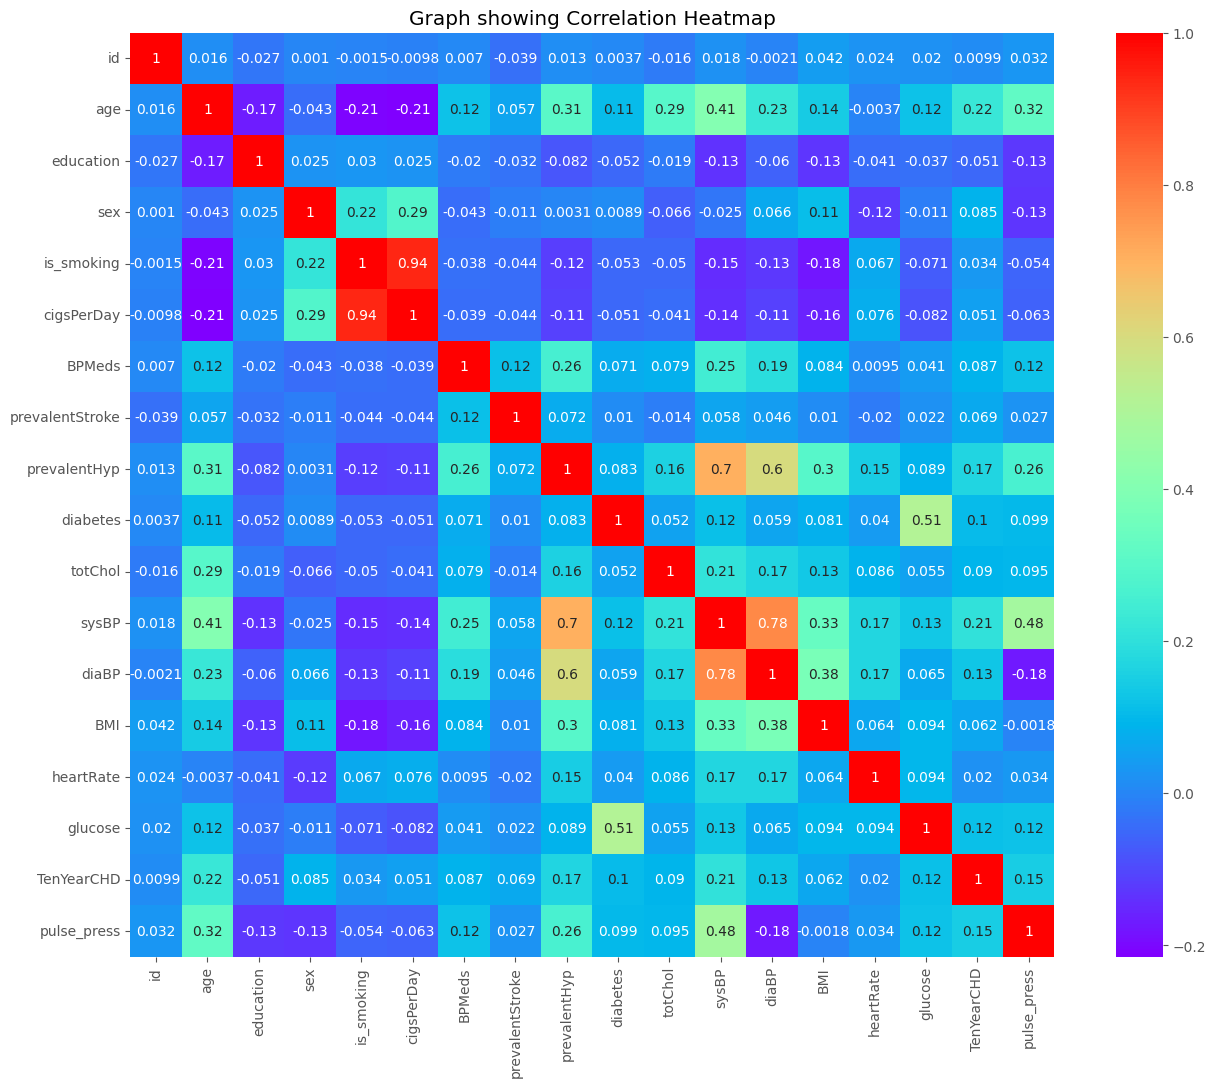

In [ ]:
# Select your features wisely to avoid overfitting
# here, let's make a new correlation heatmap
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot = True, cmap = 'rainbow',square =True).set_title('Graph showing Correlation Heatmap')
plt.show()

Now we will include only those column which are showing very high correlation with dependent variable . For this we are using 'Variance  Inflation Factor' technique to determine multicollinearity.

In [ ]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

First we will exclude target variable i.e., TenYearCHD and id as it is not giving any information.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD', 'id']]])

variables         VIF
0               age  700.576256
1         education    4.838032
2               sex    2.133451
3        is_smoking   17.726191
4        cigsPerDay   17.540959
5            BPMeds    1.130339
6   prevalentStroke    1.027232
7      prevalentHyp    2.195213
8          diabetes    1.334044
9           totChol  900.199675
10            sysBP         inf
11            diaBP         inf
12              BMI  596.397874
13        heartRate  786.004900
14          glucose  627.557742
15      pulse_press         inf

Now we will exclude sysBP and diaBP as we have already created a common feature using them and then excluding is_smoking and cigsPerDay as they showing high correlation with each other and less correlation with target variable.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD', 'id','sysBP', 'diaBP', 'is_smoking', 'cigsPerDay']]])

variables         VIF
0               age  617.481399
1         education    4.815016
2               sex    1.845913
3            BPMeds    1.126087
4   prevalentStroke    1.026449
5      prevalentHyp    1.757192
6          diabetes    1.306300
7           totChol  833.865603
8               BMI  502.319416
9         heartRate  646.573086
10          glucose  590.759719
11      pulse_press   26.539082

Now we will exclude heartRate as it is showing high VIF value and weak correlation with target variable.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD', 'id','sysBP', 'diaBP', 'is_smoking', 'cigsPerDay','heartRate']]])

variables         VIF
0               age  611.571716
1         education    4.806661
2               sex    1.828220
3            BPMeds    1.123892
4   prevalentStroke    1.026007
5      prevalentHyp    1.756956
6          diabetes    1.267641
7           totChol  747.373163
8               BMI  473.694157
9           glucose  519.574706
10      pulse_press   26.537469

BMI is showing high VIF value and weak correlation with target variable. So we will exclude that.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD', 'id','sysBP', 'diaBP', 'is_smoking', 'cigsPerDay','heartRate','BMI']]])

variables         VIF
0              age  586.883632
1        education    4.786200
2              sex    1.795690
3           BPMeds    1.123890
4  prevalentStroke    1.025814
5     prevalentHyp    1.706058
6         diabetes    1.247939
7          totChol  652.792515
8          glucose  462.902102
9      pulse_press   26.201048

We will exclude totChol as it is showing high VIF value.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD', 'id','sysBP', 'diaBP', 'is_smoking', 'cigsPerDay','heartRate','BMI', 'totChol']]])

variables         VIF
0              age  364.959682
1        education    4.721618
2              sex    1.795087
3           BPMeds    1.123498
4  prevalentStroke    1.023311
5     prevalentHyp    1.702480
6         diabetes    1.182562
7          glucose  346.579482
8      pulse_press   26.123231

Now lastly we will exclude education and glucose as they are showing weak correlation with target variable and high VIF values respectively.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['TenYearCHD', 'id','sysBP', 'diaBP', 'is_smoking', 'cigsPerDay','heartRate','BMI', 'totChol','education','glucose']]])

variables        VIF
0              age  26.763028
1              sex   1.790654
2           BPMeds   1.122074
3  prevalentStroke   1.022425
4     prevalentHyp   1.655014
5         diabetes   1.041480
6      pulse_press  25.952465

In [ ]:
# creating final dataframe
finalised_df =df[['age', 'sex', 'BPMeds', 'prevalentStroke','prevalentHyp','diabetes', 'pulse_press', 'TenYearCHD']]

##### What all feature selection methods have you used  and why?

Firstly we have used correlation heatmap for visualization of features correlation with target variable and used VIF(Variance Inflation Factor) to exclude the features that are giving almost the same information and also excluding that features that are showing weak correlation with target variable.

##### Which all features you found important and why?

We have selected few features for our final dataframe as their are showing high correlation with target variable and none of them are giving same information and their names are following--'age', 'sex', BPMeds', 'prevalentStroke','prevalentHyp','diabetes', 'pulse_press', 'TenYearCHD'.

### 5. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = finalised_df.drop(columns = 'TenYearCHD',axis = 1)
Y = finalised_df[['TenYearCHD']]

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state=0,stratify=Y)

In [ ]:
# checking the distribution of classes in training and testing test
print('Y_train value counts:')
print(Y_train.value_counts())

print('Y_test value counts:')
print(Y_test.value_counts())

Y_train value counts:
TenYearCHD
0             2303
1              409
dtype: int64
Y_test value counts:
TenYearCHD
0             576
1             102
dtype: int64


##### What data splitting ratio have you used and why?

Train set =  80

Test set = 20

### 6. Handling Imbalanced Dataset

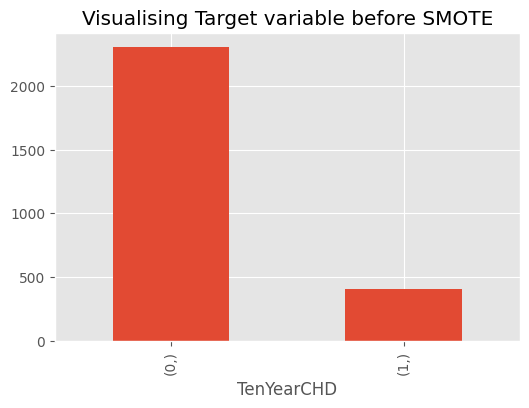

In [ ]:
# Handling Imbalanced dataset

# Visualizing the target variable(TenYearCHD) before SMOTE
plt.figure(figsize=(6,4))
Y_train.value_counts().plot(kind='bar', title='Visualising Target variable before SMOTE');

In [ ]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE(sampling_strategy = 'minority',random_state=0).fit_resample(X,Y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[Y,"Before"],[Y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
TenYearCHD
0             2879
1              511
dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0             2879
1             2879
dtype: int64 



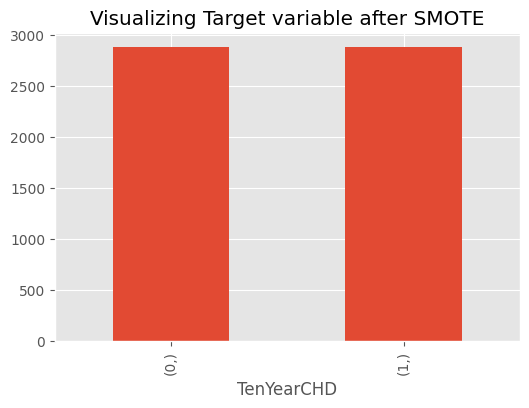

In [ ]:
# Visualizing the target variable after SMOTE
plt.figure(figsize=(6,4))
Y_smote.value_counts().plot(kind='bar', title='Visualizing Target variable after SMOTE');

##### Do you think the dataset is imbalanced? Explain Why.

Obviously our dataset is highly imbalanced as number of people having risk of CHD are less than not having risk of CHD. This imbalance in data could lead to biased predictions and can worstly affect the machine learning model. So we have to balance the dataset by applying appropriate technique.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used SMOTE(Synthetic Minority Oversampling Technique) to set the imbalanced dataset. We have used this technique because SMOTE is atype of data augmentation for the minority class. Moreover, it generates convincing new synthetic examples from the minority class that are substantially near in  feature space to already existing examples from the minority class.

In [ ]:
# Respliting the dataset after using SMOTE
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_smote,Y_smote , test_size = 0.2, random_state = 0)

In [ ]:
print(f'The shape of x_train is: {X_smote_train.shape}')
print(f'The shape of y_train is: {Y_smote_train.shape}')
print(f'The shape of x_test is: {X_smote_test.shape}')
print(f'The shape of y_test is: {Y_smote_test.shape}')

The shape of x_train is: (4606, 7)
The shape of y_train is: (4606, 1)
The shape of x_test is: (1152, 7)
The shape of y_test is: (1152, 1)


### **7. Data Scaling**

In [ ]:
# Data Scaling

# Importation of StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
stnd_scaler = StandardScaler()

# Fit and Transform
x_smote_train= stnd_scaler.fit_transform(X_smote_train)
x_smote_test= stnd_scaler.transform(X_smote_test)

We have used standardscaler to scale our data. This is a need to use it because features on different scales can lead to poor performance or slow convergence.

## ***6. ML Model Implementation***

### ML Model - 1(Logistic Regression)

# **Function**

In [ ]:
# Firstly defining a function to train the input model nd then visualizing the evaluation matrics of classification report, confusion matrix and AucRoc curve
def analyse_model_metrics(model, X_train, X_test, Y_train, Y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

  # Fit the model
  model.fit(X_train,Y_train)

  # Find Best Parameters
  try:
    print(f'The Best Parameters are: {model.best_params_}')
  except:
    pass

  # Plot Evaluation Metrics for train and test dataset
  for X, act, label in ((X_train, Y_train, 'Train-Set'),(X_test, Y_test, "Test-Set")):

    # Required Metrics
    Pred = model.predict(X)
    Pred_proba = model.predict_proba(X)[:,1]
    report = pd.DataFrame(classification_report(y_pred=Pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, Pred_proba)

    # Classification Report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette('cool', as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Classification Report')

     # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act,y_pred=Pred)
    sns.heatmap(matrix, annot=True, cmap=sns.color_palette('Blues', as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    # AUC-ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  plt.show()

  return model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

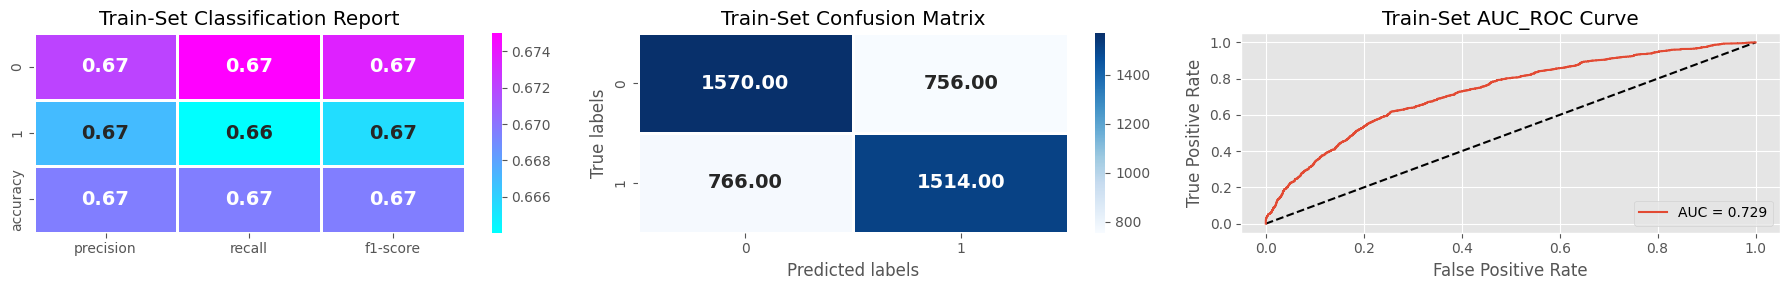

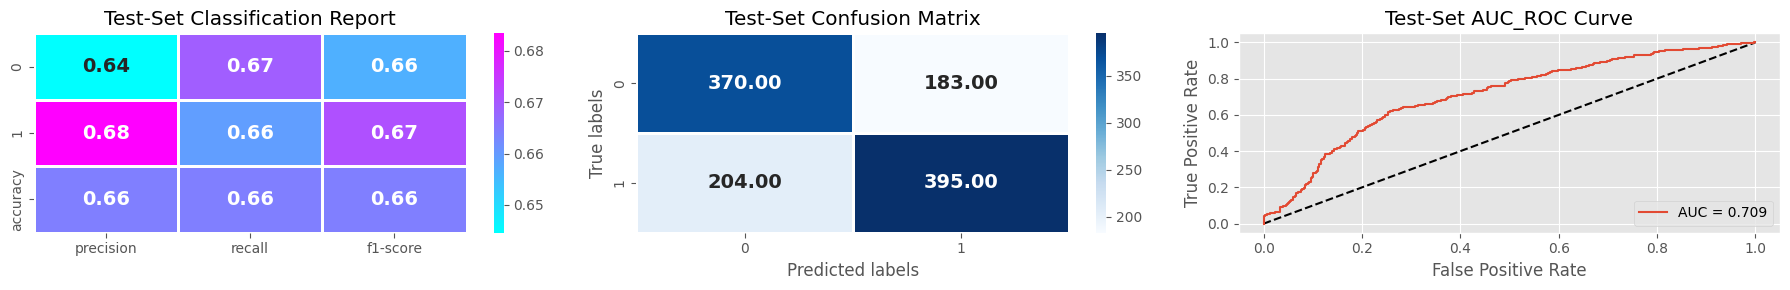

LogisticRegression(max_iter=20000, random_state=0)

In [ ]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting the Logistic Regression Model and visualizing the Metric Score Chart
Logistic_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000,random_state=0)
analyse_model_metrics(Logistic_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

Firstly, we have used LogisticRegression Model as it has the ability to provide probabilities and classify the data using continuous and discrete datasets. The value of the logistic regression mustbe between 0 and 1, which cannot go beyond this limit, so it forms a curve like the 's' sorm . The S- form is called the sigmoid function also called ad logistic function.

Now if we talk about its performance we are achieving recall on both train and test set  is 0.66 and auc-roc score of 0.72 and accuracy is 0.70


Since it is the analysis of healthcare so we need to push the limits harder in order to save maximum patients and for this we have implemented various models and compared the various metrics.

### ML Model - 2(Random Forest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

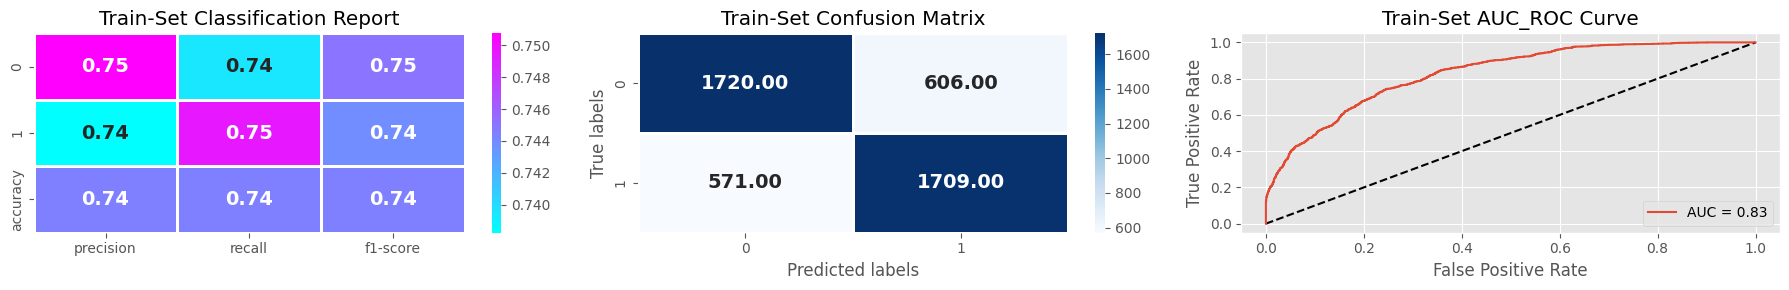

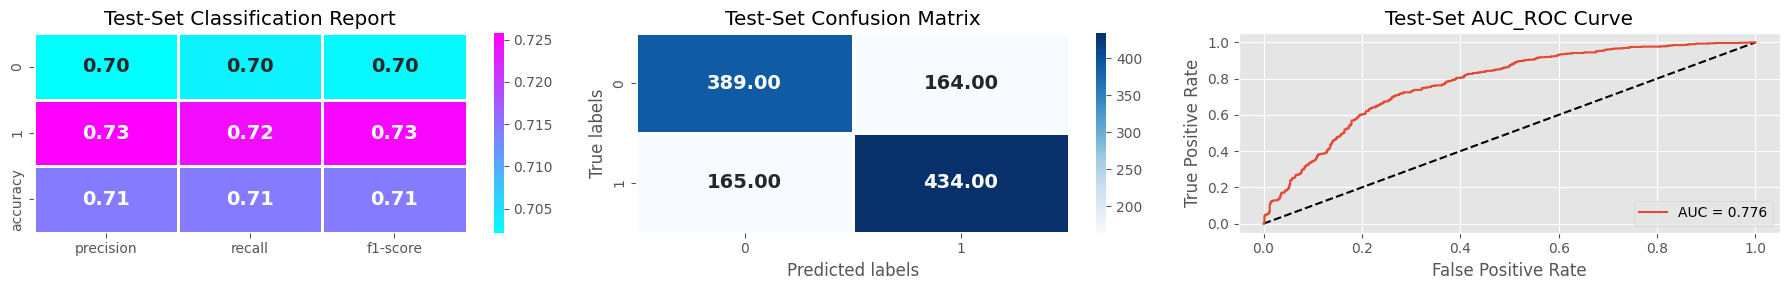

RandomForestClassifier(max_depth=7, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
# Importation of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting the RandomForestClassifier Model
RF_classifier = RandomForestClassifier(n_estimators=500,max_depth=7,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model_metrics(RF_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

We have used Random Forest Classifier as it combines the output of multiple deciion trees to reach a single result. It produces good predictions that can be understood easily also it provides higher level of accuracy in predicting outcomes over the decision tree algorithm.

In logistic regression we have got the recall of 0.66 for class 1 in test dataset but after implimenting random forest we got the recall of 0.75 and the auc-roc increased from 72% to 83% this means that our model is actually bifurcating the either of the two categories of the target variable.

We have also observed the f1-score of 0.70 for class 0 and 0.73 for class 1 in test set that means we are actually maintaining the trade between the precision and recall.

#### 2. Cross- Validation & Hyperparameter Tuning

The Best Parameters are: {'max_depth': 10, 'n_estimators': 350}


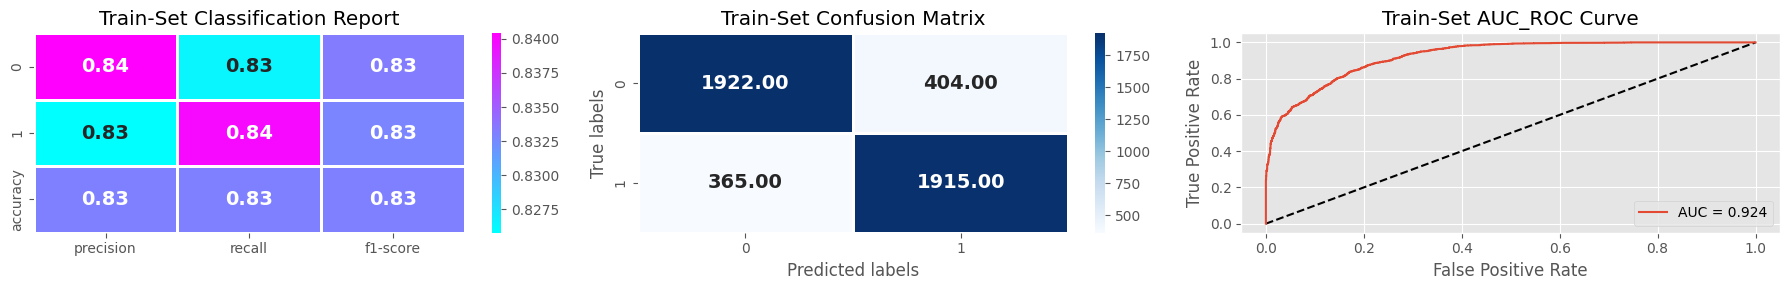

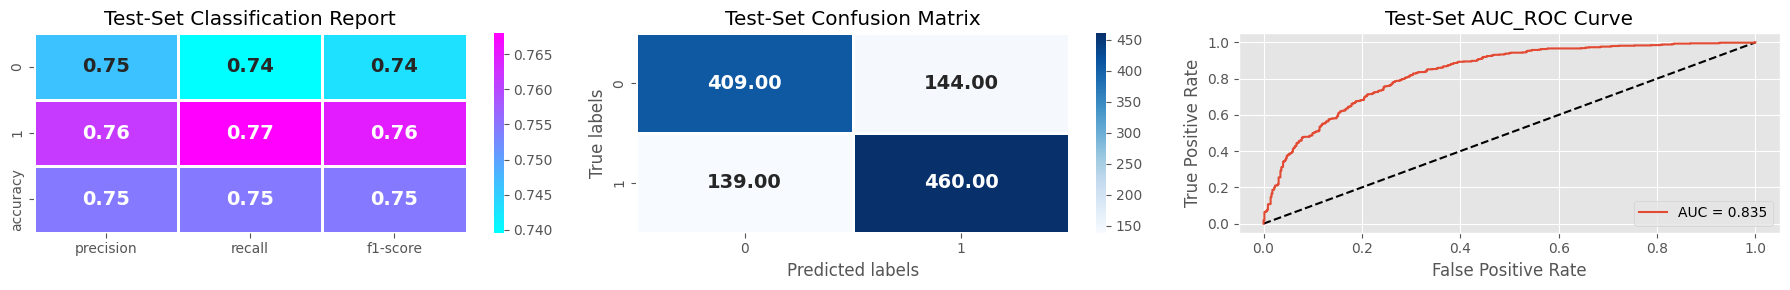

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 10],
                         'n_estimators': [150, 250, 300, 350]},
             scoring='roc_auc')

In [ ]:
# Importation of GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define Classifier Instance
classifier= RandomForestClassifier(random_state=0)

# Define Paramaters
grid_values = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]}

# Fitting RandomForestClassifier Model with GridSearchCV
RF_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=10)

# Analysing the Model
analyse_model_metrics(RF_grid_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using GridSearchCV, we were able to improve the performance of our machine learning model by identifying the best hyperparameters. GridSearchCV evaluates all possible combinations of hyperparameters and selects the optimal values for maximizing model performance, resulting in the most accurate results.

Recall of class 1 has increased from 0.79 to 0.84 in the test set.

We get the accuracy of 0.75 and auc-roc of 0.83 by hyperparameter tuning of Random forest and the best parameters found out to be {'max_depth': 10, 'n_estimators': 350}

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics such as Recall, F-1 score, Accuracy and AUC-ROC. All these metrics try to give us an indication on how close we are with the real or expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value.

### ML Model - 3(KNN)

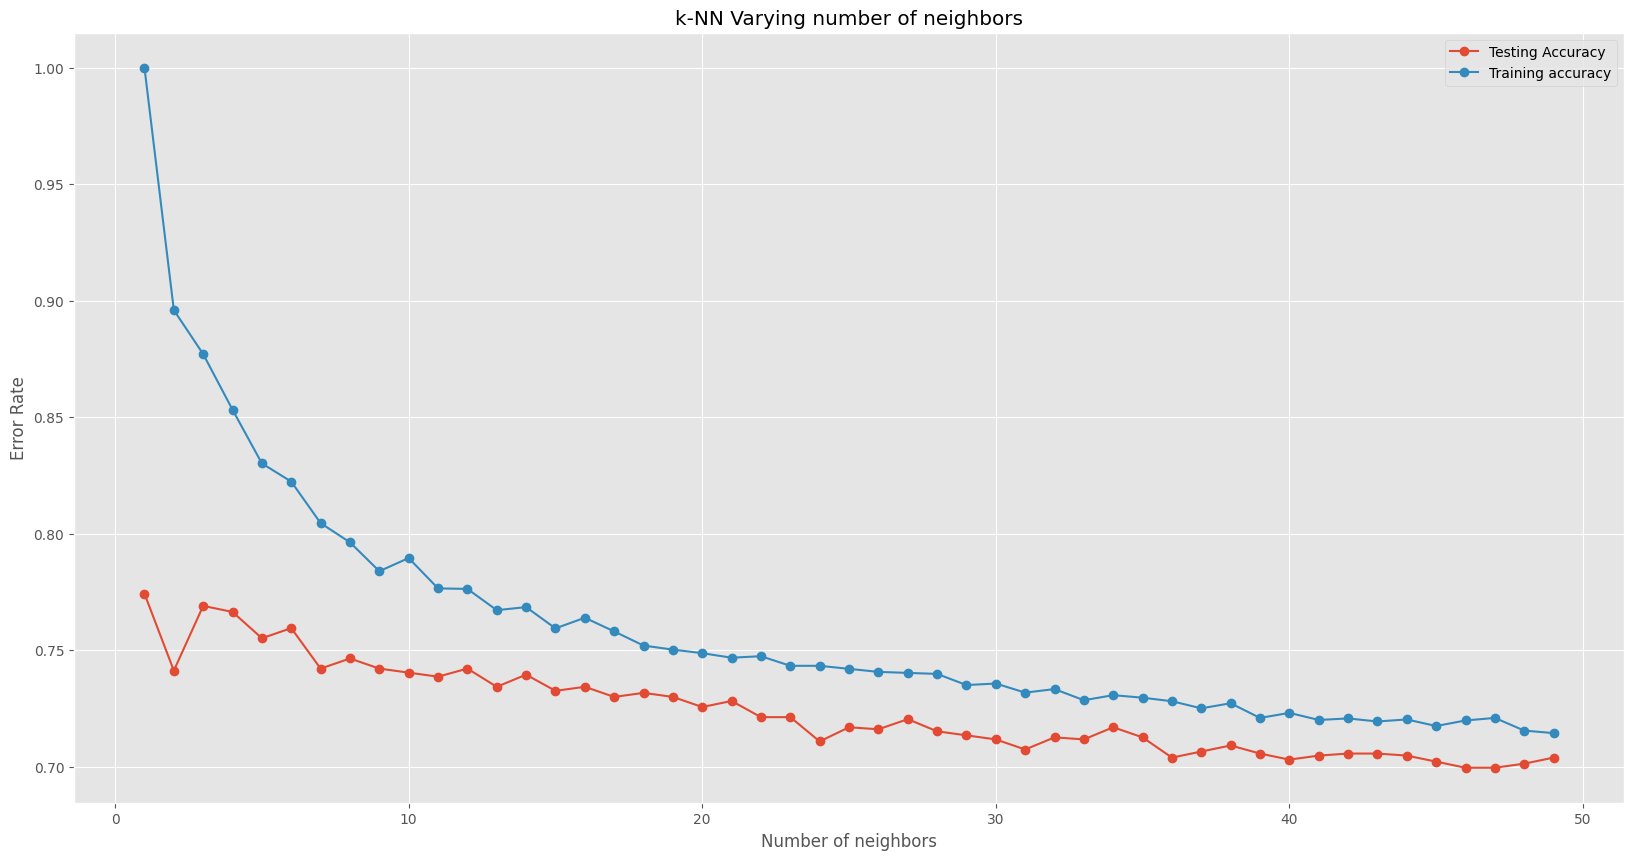

In [ ]:
# ML Model - 3 Implementation

## Determining the value of k in KNN

# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_smote_train, Y_smote_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_smote_train, Y_smote_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_smote_test, Y_smote_test)

plt.figure(figsize=(20,10))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.plot(neighbors, train_accuracy, label='Training accuracy', marker='o')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Fitting KNeighborsClassifier Model
KNN_classifier = KNeighborsClassifier(n_neighbors=9,p=2,metric='minkowski')

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model_metrics(KNN_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

#### 2. Cross- Validation & Hyperparameter Tuning

The Best Parameters are: {'n_neighbors': 3}


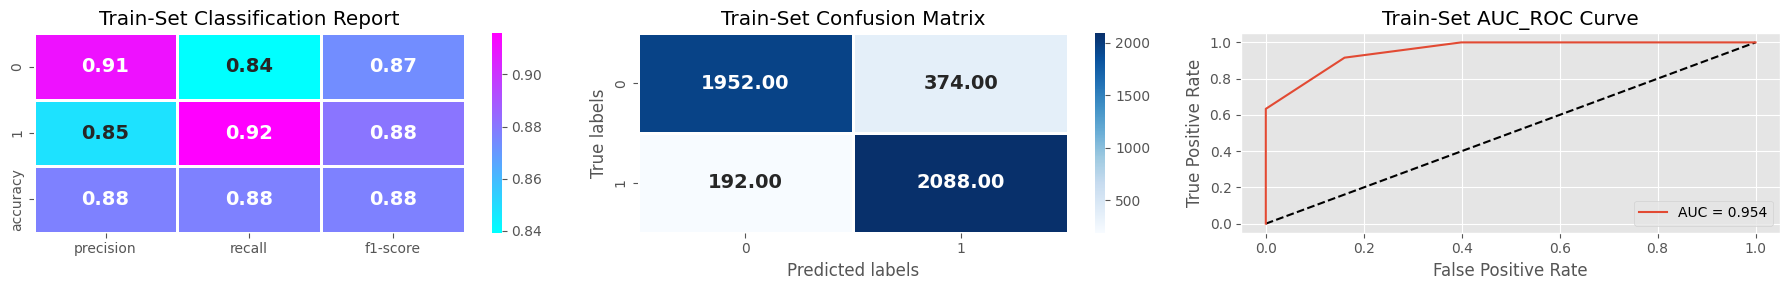

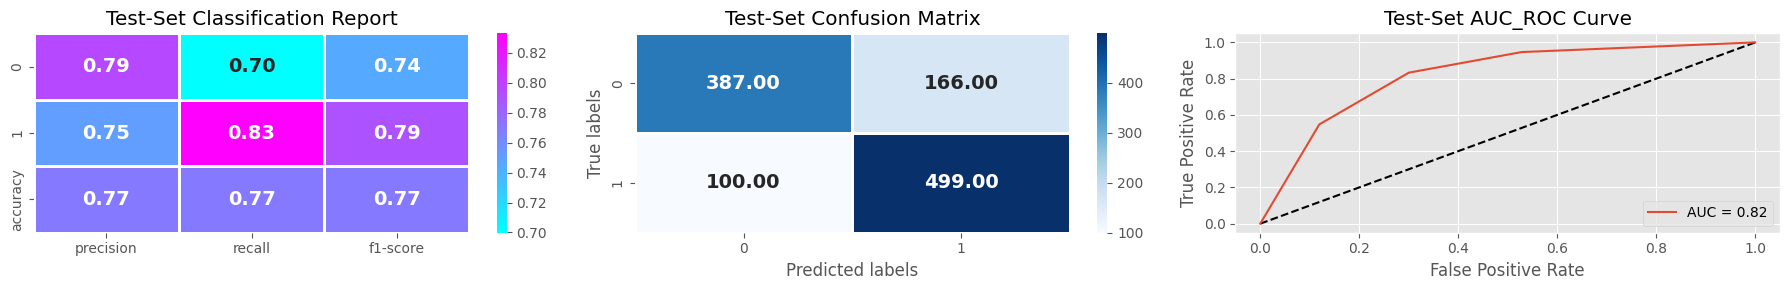

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 8, 9, 15, 20]},
             scoring='roc_auc')

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= KNeighborsClassifier()

# Defining parameters
grid_values = {'n_neighbors' : [1,2,3,5,8,9,15,20]}

# Fitting KNeighborsClassifier Model with GridSearchCV
KNN_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=10)

# Analysing the model
analyse_model_metrics(KNN_grid_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Using GridSearchCV the best parameters are found out to be {'n_neighbors': 3} which increases the recall of minority class (0.070) and for roc score it has been increased from 0.81 to 0.82 by hyperparameter tuning.

# ML- Model 4(SVM)

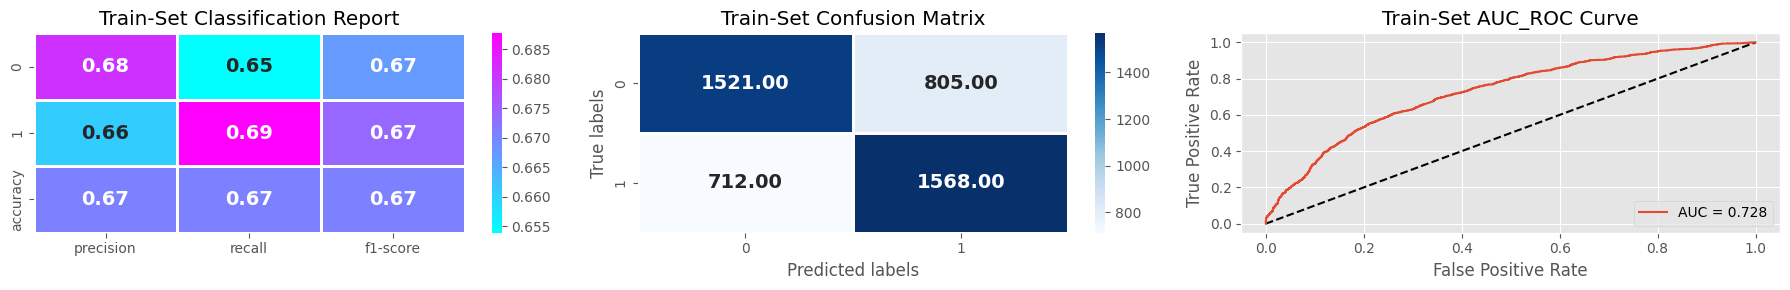

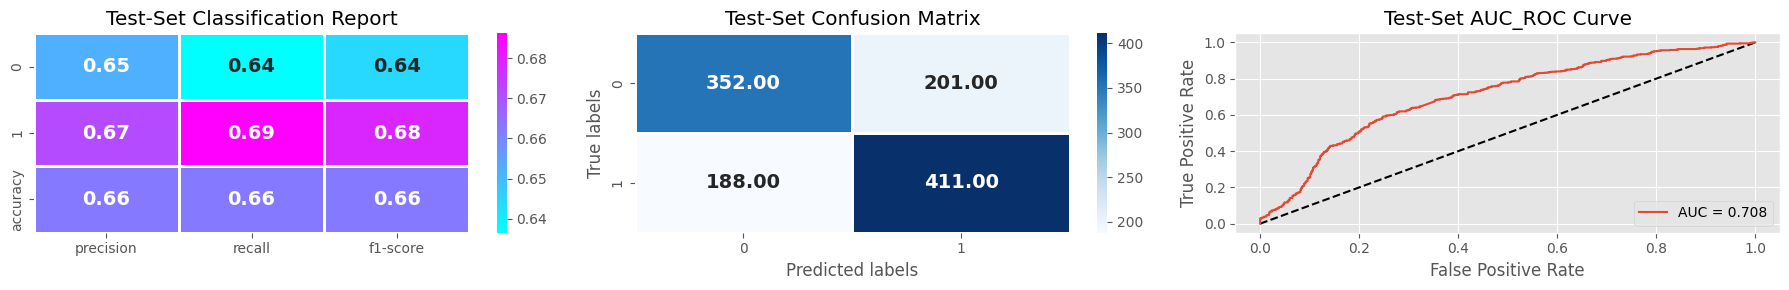

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
# Importing SVC
from sklearn.svm import SVC

# Fitting SVC Model
SVC_classifier = SVC(kernel='linear',probability=True,random_state=0)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model_metrics(SVC_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

**Cross Validation and Hyperparameter Tuning**

The Best Parameters are: {'C': 1, 'kernel': 'poly', 'max_iter': 1800}


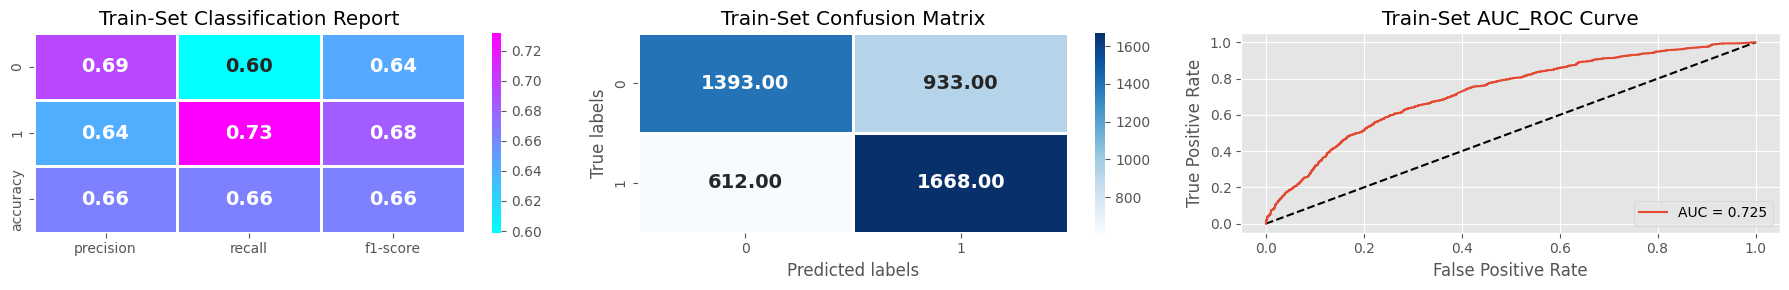

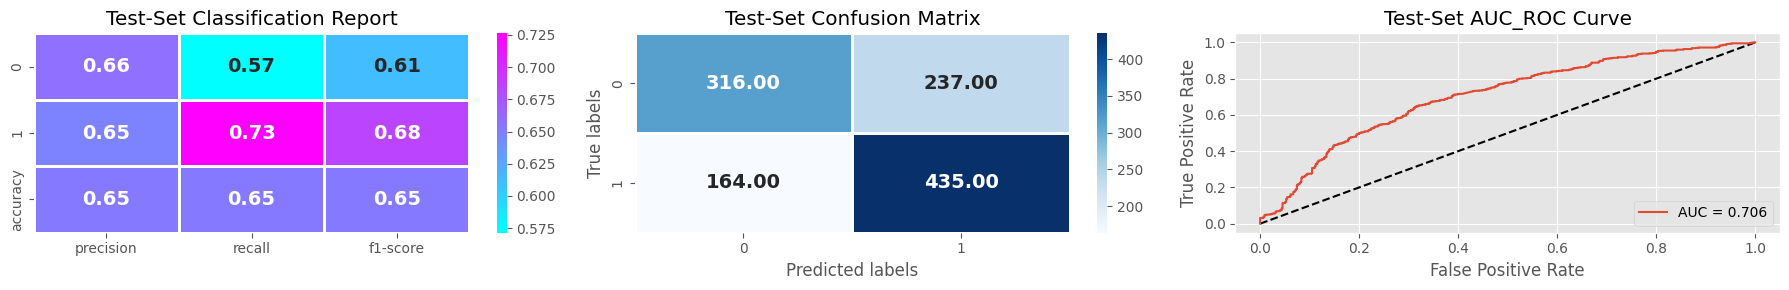

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 5],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [1800]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= SVC(probability=True,random_state=0)

# Defining parameters
grid_values = {'kernel': ["linear","rbf","poly","sigmoid"], 'C': [0.1, 1,5], 'max_iter' : [1800]}


# Fitting RandomForestClassifier Model with GridSearchCV
SVM_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model_metrics(SVM_grid_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)




Which hyperparameter optimization technique have you used and why?





GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values across all posible combination.

Have you seen any improvement?  Note down the improvement with updates Evaluation metric Score Chart.




After using GridSearchCV the best parameters found out to be {'C': 1, 'kernel': 'poly', 'max_iter': 1800}

Significant improvement has been observed in Precision, Recall, Accuracy and in all other metrics as well, Precision dereased from 0.67 to .65 which is not a good indication, recall incresed from 0.69 to 0.73.

# ML- Model 5(Naive Bayes)

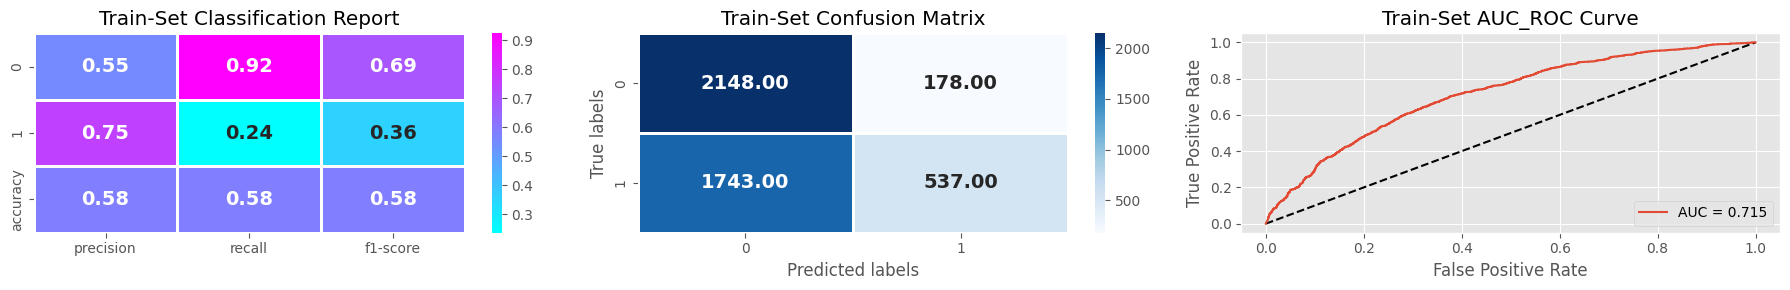

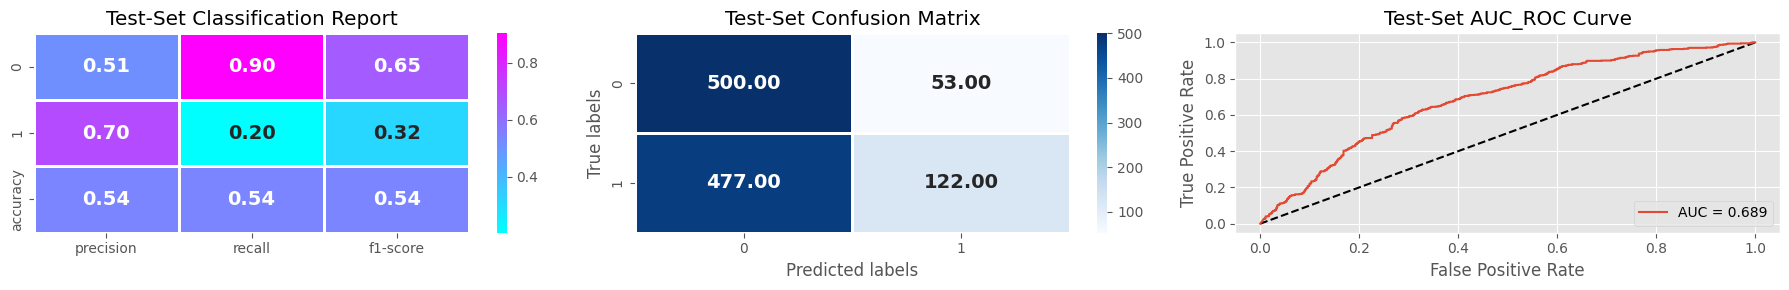

GaussianNB()

In [ ]:
# Importing GaussianNB
from sklearn.naive_bayes import GaussianNB

# Fitting GaussianNB Model
NB_classifier = GaussianNB()

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model_metrics(NB_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

# ML Model -6(XGboost)

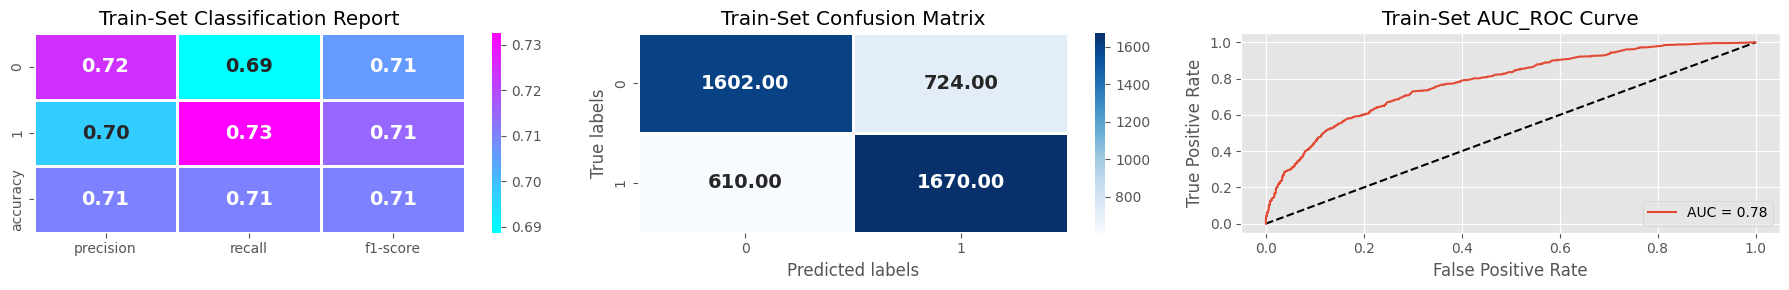

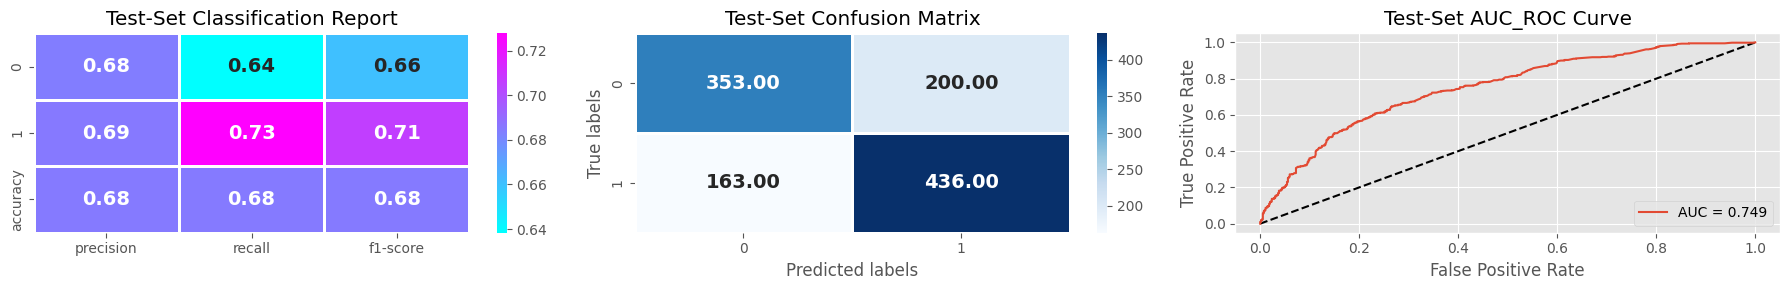

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=350, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=350,max_depth=1,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model_metrics(XGB_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

**Cross Validation and Hyperparameter Tuning**

The Best Parameters are: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}


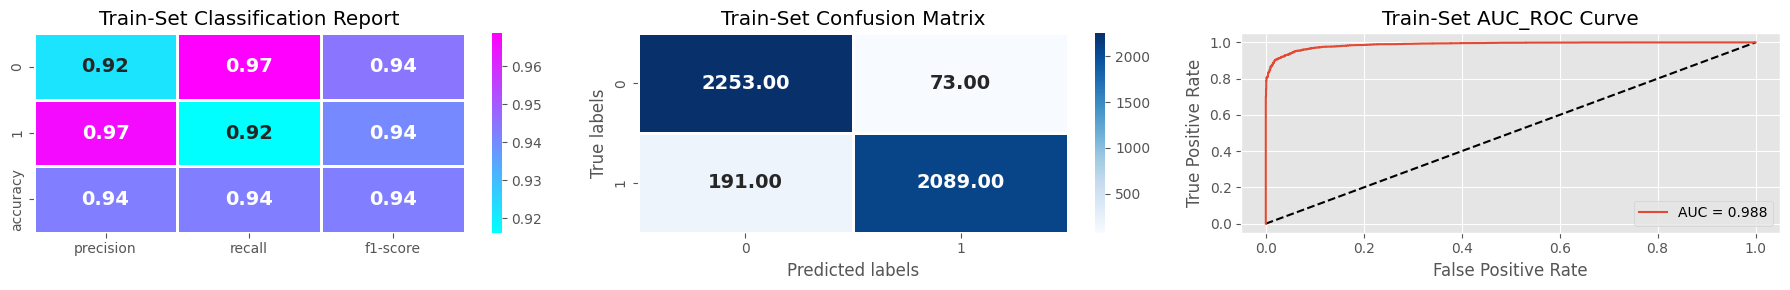

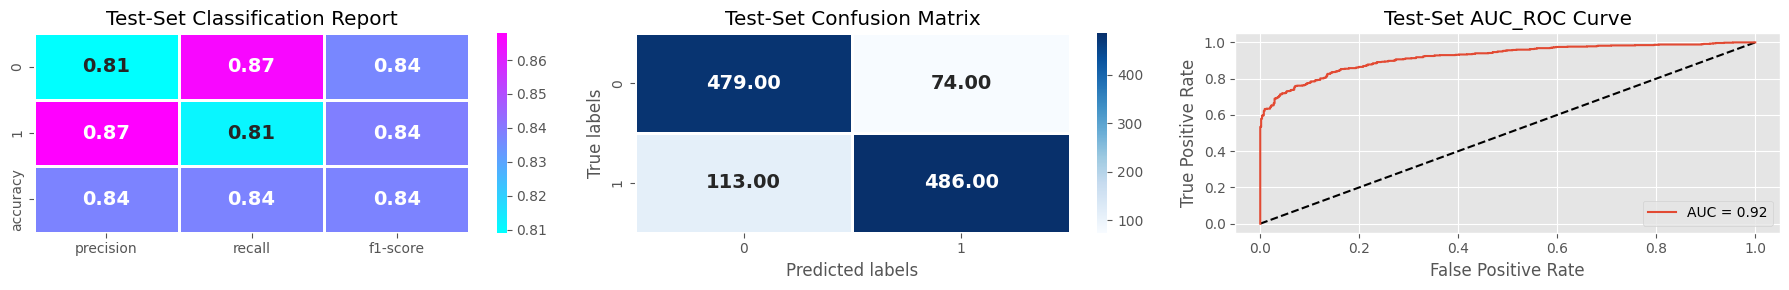

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 4, 5, 7, 8],
                         'n_estimators': [200, 250, 300]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= XGBClassifier(random_state=0)

# Defining parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[200,250,300], 'max_depth':[3,4,5,7,8]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model_metrics(XGB_grid_classifier, X_smote_train, X_smote_test, Y_smote_train, Y_smote_test)

**Which hyperparameter optimization technique have you used and why?**

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**


Achieved highest recall, precison, accuracy and F-1 score till now after tuning the hyperparameters of XGboost.

The F1 Score of the majority and minority class are 0.84 and 0.84 that means we equally maximizing the precision and recall since F1 score is the harmonic mean of precision and recall and able to maintaining the trade-off between them.

The AUC-ROC curve we are obtaining has covered 0.92 of the area and that means our model is accurately distinguishing between the negative and the positive classes and for these results the best paramters are found out to be 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since our data is of healthcare so we have majorly focuses on Recall as it contains FN(Falsely-Negative) and we do not want our model to predict the patients that may infected by CHD as healthy(Risky). In order to avoid such cases we have emphasised much of Recall.

Also we have considered F-1 score as other evaluation metric as its is the harmonic mean of the Precision and Recall and maintains a trade-off between the two (As we also don't want our model to predict the healty patients as infected).

To determine how better our model is doing we have consider Accuracy and AUC-ROC score to get the percentage of correct predictions of either of the classes among all the predictions made by the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Storing different regression metrics in order to make dataframe and then comparing them
models = ['Logistic_regression', 'Random_forest', 'KNN','SVM','Naive_bayes', 'XGboost']
Precision = [0.68,0.76,0.75,0.65,0.70,0.87]
Recall = [0.66,0.77,0.83,0.73,0.20,0.81]
F1_Score= [0.67,0.76,0.79,0.68,0.32,0.84]
Accuracy =[0.66,0.75,0.77,0.65,0.54,0.84]
AUCROC = [0.70,0.83,0.82,0.70,0.68,0.92]

# Create dataframe from the lists
data = {'Models': models,
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUCROC': AUCROC,
       }
metric_df = pd.DataFrame(data)

# Printing the Dataframe
metric_df

Models  Precision  Recall  F1_Score  Accuracy  AUCROC
0  Logistic_regression       0.68    0.66      0.67      0.66    0.70
1        Random_forest       0.76    0.77      0.76      0.75    0.83
2                  KNN       0.75    0.83      0.79      0.77    0.82
3                  SVM       0.65    0.73      0.68      0.65    0.70
4          Naive_bayes       0.70    0.20      0.32      0.54    0.68
5              XGboost       0.87    0.81      0.84      0.84    0.92

As we can see here XGboost is giving the best accuracy among all 6 model. so we will choose XGboost model as our final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing which allows for faster training times.

# Global Explainibility

Text(0.5, 0, 'Relative Importance')

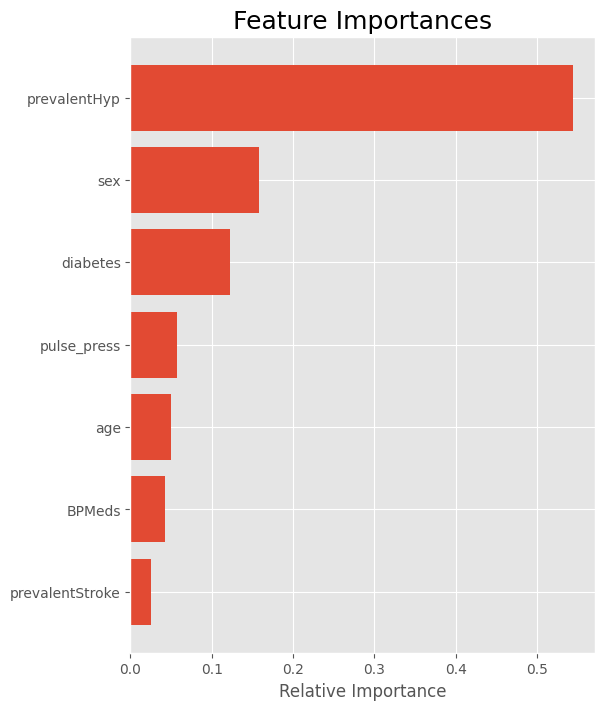

In [ ]:
# Plotting the barplot to determine which feature is contributing the most
features = finalised_df.columns
importances = XGB_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(6,8))
plt.grid(zorder=0)
plt.title("Feature Importances", fontsize=18)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Importation of pickle module
import pickle

In [ ]:
# Save the File
filename = 'CHDrisk_prediction.pkl'
pickle.dump(XGB_grid_classifier,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
Classification_Model = pickle.load(open(filename,'rb'))

# prediction of unseen data
Classification_Model.predict(X_smote_test)

array([1, 0, 0, ..., 1, 0, 0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Conclusion drawn from EDA**



*   Percentage of Male Patient is 56.7%.

  Percentage of Female Patient is 43.3%.

  Males are more prone to CHD risk as compared to Females.



*   Patients taking smoke and not taking smoke are almost equal with a slight difference.

  Most of the patients are consuming 20 cigarettes per day. It will ultimately increase the pace of number of patients having cardiovascular disease
*   0.6% patients have a history of prevalent strokes.

  31.5% patients have a history of prevalnt hypertension.

  2.6% patients have diabetes.



*   The majority of the individuals in the dataset have total cholesterol levels between 200-250 mg/dL, with a few individuals having total cholesterol levels below 160 mg/dL or above 300 mg/dL.

  The majority of the individuals in the dataset have a heart rate between 60-90 beats per minute, with a few individuals having a heart rate below 50 beats per minute or above 100 beats per minute.

  The majority of the individuals in the dataset have a blood glucose level between 70-90 mg/dL, with a few individuals having a blood glucose level below 60 mg/dL or above 130 mg/dL.
*  Most of the education level is of 1 with 43.6% and least is level 4 with 11.0%.



*  Female has less chances of having cardio risk meanwhile Male has high chances of having cardio risk.


*   patients of age group 65 to 70 are more tends to cardio risk.



*   Patients having prevalent stroke or prevalent hypertension are more prone to CHD

  Smokers are slightly at more risk of CHD than non-smokers.


*   Patients having diabetes are more prone to CHD.



*   People who are not on a BP medication are having minimal chances as compared to medicated patients of suffering to CHD.
*   Both Male and Female patients having prevalent stroke are more prone to CHD and prevalent stroke in Females are more so they are at more risk of CHD as compared to Males.



*  Patients who are not smoking have strong history of prevalent hypertension as compared to those who are smoking.
Patients having history of prevalent hypertension regardless of smoking or not are at high risk of CHD.
*  There is not much difference in cholestrol level for being a solitary reason of CHD. At the same time diabetic patients are slightly more prone to CHD. We should avoid foods having high cholestrol. Low cholestrol meal can reduce overweight and reduction in overweight will ultimatelyredduce the chances of diabetes as overweight is the main factor for diabetes.


**Coclusion drawn from ML Model**



*   We have implemented 6 ML Model which are "Logistic Regression", "RandomForest", "KNN", "SVM","NaiveBayes" and "XGboost".
*   'NaiveBayes' and 'SVM' Model has performed worst during the implementation.



*   Among all the 6 ML Model "XGboost" is performing best with accuracy 84% and precision 87%.
*   So we have chosen "XGboost" as our final optimal model.



*   Best parameters of "XGboost" found out to be 'learning_rate':0.1, 'max_depth':8 and 'n_estimators':200.
*   'prevalentHyp', 'sex' and 'diabetes' are the most contributing features towards the predictions.












### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***